# Getting Started With VerifyML

A quickstart guide to documenting your model findings in a VerifyML Model Card.

## Installation

In [ ]:
!pip install verifyml
!pip install seaborn

## Imports

In [1]:
import pandas as pd
import verifyml.model_card_toolkit as mctlib
import verifyml.model_tests.utils as utils
import seaborn as sns
import uuid

from datetime import date
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split

# Load Sample Data

In this example, we'll use the [Breast Cancer Wisconsin dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) that comes bundled with `sklearn`.

In [2]:
cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Data Exploration

## Plot the mean radius feature for both the train and test sets

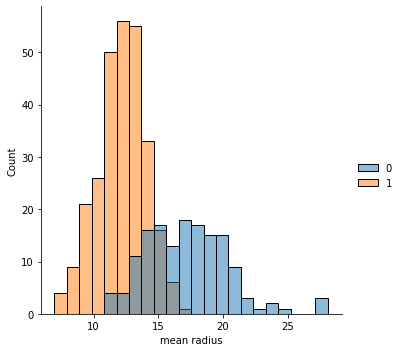

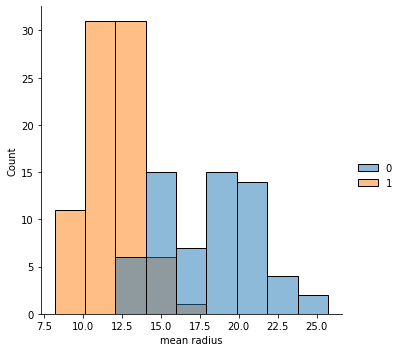

In [3]:
# utils.plot_to_str() converts the plot to a base-64 encoded string that the model card will accept

sns.displot(x=X_train['mean radius'], hue=y_train)
mean_radius_train = utils.plot_to_str()

sns.displot(x=X_test['mean radius'], hue=y_test)
mean_radius_test = utils.plot_to_str()

# Create a Classifier

/home/jason/miniconda3/envs/verifyml/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


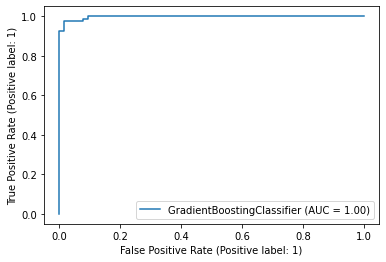

In [4]:
clf = GradientBoostingClassifier().fit(X_train, y_train)

# Plot an ROC curve
plot_roc_curve(clf, X_test, y_test)
roc_curve = utils.plot_to_str()

# Init Model Card

In [5]:
mct = mctlib.ModelCardToolkit(
    output_dir='model_card_output', # directory that the model card output will be saved to
    file_name='first_model_card'    # file name of the model card that will be created
)

# init model card assets using the toolkit
model_card = mct.scaffold_assets()

After running the cell above, you should find a new directory with the name you specified in `output_dir` (`model_card_output` in this case). It should contain 2 subdirectories for now:

1. `data/`: contains a protobuf file with the format `<file_name specified above>.proto`. In this case, it should be `first_model_card.proto`.
2. `template/`: contains the Jinja templates that will be used later when rendering the Model Card

# Fill Out Model Card

## Model Details

In [6]:
# name, overview, owners, references, version
model_card.model_details.name = 'Breast Cancer Wisconsin (Diagnostic) Dataset'

model_card.model_details.overview = 'This model predicts whether breast cancer is benign or malignant based on image measurements.'

model_card.model_details.owners = [
    mctlib.Owner(
        name='Model Cards Team', 
        contact='model-cards-team@email.com', 
        role='data scientist'
    )
]

model_card.model_details.references = [
    mctlib.Reference(reference='https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)'),
    mctlib.Reference(reference='https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf')
]

model_card.model_details.version.name = str(uuid.uuid4())
model_card.model_details.version.date = str(date.today())

## Considerations

In [7]:
# ethical considerations, limitations, use cases, users
model_card.considerations.ethical_considerations = [
    mctlib.Risk(
        name='Manual selection of image sections to digitize could create selection bias',
        mitigation_strategy='Automate the selection process'
    )
]

model_card.considerations.limitations = [mctlib.Limitation(description='Breast cancer diagnosis')]

model_card.considerations.use_cases = [mctlib.UseCase(description='Breast cancer diagnosis')]

model_card.considerations.users = [
    mctlib.User(description='Medical professionals'), 
    mctlib.User(description='ML researchers')
]

## Model Parameters

In [8]:
# add details for train and test datasets
mc_dataset_train = mctlib.Dataset()
mc_dataset_test = mctlib.Dataset()

mc_dataset_train.graphics.description = f'{len(X_train)} rows with {len(X_train.columns)} features'
mc_dataset_test.graphics.description = f'{len(X_test)} rows with {len(X_test.columns)} features'

mc_dataset_train.graphics.collection = [mctlib.Graphic(image=mean_radius_train)]
mc_dataset_test.graphics.collection = [mctlib.Graphic(image=mean_radius_test)]

# add details to model card
model_card.model_parameters.data = [mc_dataset_train, mc_dataset_test]

## Performance Metrics

In [9]:
# adding model details in a nested format (arguably less readable)
model_card.quantitative_analysis.performance_metrics = [
  mctlib.PerformanceMetric(
    type='accuracy',
    slice='training',
    value=str((49 + 89) / (49 + 89 + 2 + 3)),
    graphics=mctlib.GraphicsCollection(
      description='ROC curve and confusion matrix',
      collection=[mctlib.Graphic(image=roc_curve)]
    )
  )
]

# Export Model Card

In [16]:
# needed to display HTML and markdown in notebooks
from IPython.display import Markdown, HTML

# update the model card with all changes made so far
mct.update_model_card(model_card)

## Export as Markdown

In [11]:
md = mct.export_format(
    output_file='my_first_model_card.md', 
    template_path=f'{mct.output_dir}/template/md/default_template.md.jinja'
)

After running the cell above, you'll find a new subdirectory called `model_cards` inside the `output_dir` you defined above. Within it, there will be a Markdown file named whatever was specified in `output_file` above. In this case, there should be a `my_first_model_card.md` file in the `model_card_output/model_cards` subdirectory.

Note how `template_path` points to the templates subdirectory that was previously created when `scaffold_assets()` was called (`model_card_output/templates` in this case). If you'd prefer to use your own templates, feel free to use another `template_path`.

In [17]:
# display the markdown
Markdown(md)


























# Model Card for Breast Cancer Wisconsin (Diagnostic) Dataset

## Model Details

### Overview
This model predicts whether breast cancer is benign or malignant based on image measurements. 

### Version
  
name: f83c982e-435a-4cfd-a783-608d183bbce1 

  
date: 2021-10-21 

  

### Owners

* Model Cards Team(owner.role), model-cards-team@email.com 


### References

* [https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))
* [https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf](https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf)


## Considerations

### Intended Users 
* Medical professionals
* ML researchers


### Use Cases

* Breast cancer diagnosis



### Limitations

* Breast cancer diagnosis




### Ethical Considerations

* __Risk:__ Manual selection of image sections to digitize could create selection bias
  * __Mitigation Strategy:__ Automate the selection process







## Datasets
  
    
    
    
#### Sensitive data
    
    
    
    
    
    
      
  
  
<img src="data:image/jpeg;base64,iVBORw0KGgoAAAANSUhEUgAAAZAAAAFgCAYAAACVLS/VAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90
bGliIHZlcnNpb24zLjQuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/MnkTPAAAACXBIWXMAAAsT
AAALEwEAmpwYAAAUwElEQVR4nO3df6xfd33f8efLdgJVoYSAZ0Wxb8xGFpZRkUi3aQsMUadE6UpJ
ymgGrZirmrnSRgVz10LdP4LXKUqnLqUqrJWHI4wUEtIUljRlIRAHUrIqxAGWH6QsWRpj34bYKTBI
pbaz/d4f35PlYtn3fr8f3/P9fu+9z4f01T3nfM/nnPc9+vq+fM7nez4nVYUkSaNaM+kCJEnLkwEi
SWpigEiSmhggkqQmBogkqcm6SRcwjMsvv7zuuOOOSZchScPKpAsYh2VxBvLMM89MugRJ0gmWRYBI
kqaPASJJamKASJKaGCCSpCYGiCSpiQEiSWpigEiSmhggkqQmBogkqYkBIklqYoBIkpoYIJKkJgaI
JKmJAbICbZ7ZSJKhX5tnNk66ZEnL0LJ4HohGc+DgHLXvmqHXz5adPVYjaaXyDESS1MQAkSQ1MUAk
SU0MELE22OkuaWR2ootjhZ3ukkbmGYgkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKASJKaGCCS
pCYGiCSpiQEiSWpigEiSmhggkqQmBogkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKASJKaGCCS
pCYGiCSpybo+N57kSeB7wDHgaFXNJjkb+ASwGXgSuKqqvt1nHZKkpTeOM5CfqKqLqmq2m38/cFdV
nQ/c1c1LkpaZSVzCugLY203vBa6cQA2SpNPUd4AUcGeSB5Js75ZtqKqnuulvAhtO1jDJ9iT7k+w/
cuRIz2VOr80zG0ky0kuSxqHXPhDg9VU1l+QfAJ9N8hfz36yqSlIna1hVu4HdALOzsyddZzU4cHCO
2nfNSG2yZWdP1UjS83o9A6mque7nYeBTwCXA00nOAeh+Hu6zBklSP3oLkCQ/mOTFz00DlwEPA7cB
W7vVtgK39lWDJKk/fV7C2gB8qrsmvw74eFXdkeR+4OYk24ADwFU91iBJ6klvAVJVTwCvOcnyvwYu
7Wu/kqTx8E50SVITA0SS1MQAkSQ1MUAkSU0MEElSEwNEktTEAJEkNTFAJElNDBBJUhMDRJLUxACR
JDUxQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0MEElSEwNEktTEAJEkNTFAJElNDBBJUhMDRJLUxACR
JDUxQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0MEElSEwNEktTEAJEkNTFAJElNDBBJUhMDRJLUxACR
JDUxQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0MEElSEwNEktTEAJEkNek9QJKsTfKVJLd3869Icl+S
x5N8IsmZfdcgSVp64zgDeQ/w6Lz53wZ+t6peCXwb2DaGGiRJS6zXAEmyEfhp4CPdfIAtwC3dKnuB
K/usQZLUj77PQD4I/DpwvJt/GfCdqjrazR8Czu25BklSD3oLkCRvBg5X1QON7bcn2Z9k/5EjR5a4
OknS6erzDOR1wFuSPAncxODS1e8BZyVZ162zEZg7WeOq2l1Vs1U1u379+h7LlCS16C1Aquo3qmpj
VW0G3g7sq6pfAO4G3tatthW4ta8aJEn9mcR9IO8DdiR5nEGfyJ4J1CBJOk3rFl/l9FXV54HPd9NP
AJeMY7+SpP54J7okqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKASJKaGCCSpCYGiCSpiQEiSWpi
gEiSmhggkqQmBogkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKASJKaGCCSpCYGiCSpiQEiSWpi
gEiSmhggkqQmBogkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKASJKaGCAa2dpAkpFem2c2Trps
SUts3aQL0PJzrKD2XTNSm2zZ2VM1kibFMxBJUhMDRJLUxACRJDUxQCRJTQwQSVKToQIkyeuGWSZJ
Wj2GPQP5/SGXSZJWiQXvA0ny48BrgfVJdsx764eAtX0WJkmabovdSHgm8KJuvRfPW/5d4G19FSVJ
mn4LBkhVfQH4QpKPVtWBMdUkSVoGhh3K5AVJdgOb57epqi19FCVJmn7DBsgfAX8IfAQ4NkyDJC8E
7gFe0O3nlqq6OskrgJuAlwEPAO+sqr8ftXBJ0mQNGyBHq+oPRtz23wFbqurZJGcAX0zy34EdwO9W
1U1J/hDYBoy6bUnShA37Nd4/SfJvkpyT5OznXgs1qIFnu9kzulcBW4BbuuV7gSsb6pYkTdiwZyBb
u5+/Nm9ZAf9woUZJ1jK4TPVK4MPA/wa+U1VHu1UOAeeeou12YDvAzMzMkGVKksZlqACpqle0bLyq
jgEXJTkL+BTwqhHa7gZ2A8zOzlbL/iVJ/RkqQJL8q5Mtr6qPDdO+qr6T5G7gx4GzkqzrzkI2AnPD
FitJmh7D9oH8yLzXPwM+ALxloQZJ1ndnHiT5AeBNwKPA3Tx/E+JW4NZRi5YkTd6wl7B+Zf58Fww3
LdLsHGBv1w+yBri5qm5P8jXgpiT/EfgKsGfkqiVJE9f6TPS/ARbsF6mqB4GLT7L8CeCSxv1KkqbE
sH0gf8LgW1cwGETxnwA391WUJGn6DXsG8jvzpo8CB6rqUA/1SNKql7XrDnH82ElvcWiyZu1cHTu6
ccF9JpcDv8fgJOEjVXXtYpsdtg/kC0k2MOhEB3hsmHaSpAbHj5173vtu37VUmzvw22++eqH3u77q
DzP4stMh4P4kt1XV1xZqN+wTCa8CvgT8HHAVcF8Sh3OXpJXhEuDxqnqiG5vwJuCKxRoNewnrN4Ef
qarDMPiKLvA5nh+SRJK0fJ0LHJw3fwj40cUaDXsfyJrnwqPz1yO0lSStQMOegdyR5DPAjd38vwQ+
3U9JkqQxmwM2zZsfapSQxZ6J/kpgQ1X9WpK3Aq/v3vpz4IbGQiVJ0+V+4PzueU1zwNuBn1+s0WJn
IB8EfgOgqj4JfBIgyQ937/1Mc7mSpJNbs3ZusW9Ojbq9hd6uqqNJ3g18hsHXeK+vqkcW2+xiAbKh
qh46yc4eSrJ5sY1Lkka32D0bveyz6tOM2DWxWEf4WQu89wOj7EiStLIsFiD7k/zrExcmeReDB0VJ
klapxS5hvRf4VJJf4PnAmAXOBH62x7okSVNuwQCpqqeB1yb5CeDV3eI/rap9vVcmSZpqw46FdTeD
B0FJkgR4N/nYbZ7ZSJKhX5I0rVofKKVGBw7OUfuuGXr9bNnZYzWSptEZa3Po6HGWbDj3dWuY+7/H
arHh3K8H3gwcrqpXL7Tu/9/uUhQnSVo6R49zbl39Q0s2nHt2fXeYmxI/CnwI+Niw2/USliSJqroH
+NYobQwQSVITA0SS1MQAkSQ1MUAkSU38FpYkTZl1a5gb8ptTQ29vsXWS3Ai8EXh5kkPA1VW1Z8Ht
Lk15kqSlstg9G32oqneM2sZLWJKkJgaIJKmJASJJamKASJKaGCCSpCYGiCSpiQEiSWpigEiSmhgg
kqQmBogkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKASJKaGCCnYfPMRpKM9JKklcInEp6GAwfn
qH3XjNQmW3b2VI0kjVdvZyBJNiW5O8nXkjyS5D3d8rOTfDbJY93Pl/ZVgySpP31ewjoK/GpVXQj8
GPBvk1wIvB+4q6rOB+7q5iVJy0xvAVJVT1XVl7vp7wGPAucCVwB7u9X2Alf2VYMkqT9j6URPshm4
GLgP2FBVT3VvfRPYcIo225PsT7L/yJEj4yhTkjSC3gMkyYuAPwbeW1Xfnf9eVRVQJ2tXVburaraq
ZtevX993mZKkEfUaIEnOYBAeN1TVJ7vFTyc5p3v/HOBwnzVIkvrR57ewAuwBHq2q6+a9dRuwtZve
CtzaVw2SpP70eR/I64B3Ag8l+Wq3bCdwLXBzkm3AAeCqHmuQJPWktwCpqi8Cp7r1+tK+9itJGg+H
MpEkNTFAJElNDBBJUhMDRJLUxACRJDUxQLRibJo5b6Rns2yaOW/SJUvLms8D0Ypx6OA3uO7Orw+9
/o7LLuixGmnl8wxEktTEAJEkNTFAJElNDBCNR9ZMXwf3iDXZ8S59PzvRNR51fPo6uEesCex4l+bz
DESS1MQAkSQ1MUAkSU3sA9HosoZs2Tlys127dvVQjKRJMUA0ujrOdbv3jNRkx/ZtXL11+OeI7bj3
46NWJWnMvIQlSWpigEiSmhggkqQmBog0ihHvXl93xpne6a4Vy050aRQNd9RP3R340hLxDESS1MQA
kSQ1MUAkSU0MEElSEwNEktTEAJEkNTFAJElNDBBJUhMDRJLUxDvRNZ26IUMkTS8DRNNpxCFDwGFA
pHHzEpYkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKASJKaGCCSpCbeSKjBXd9bdk66CknLjAGi
wV3fu/cMvfqO7dt6LEbSctHbJawk1yc5nOThecvOTvLZJI91P1/a1/4lSf3qsw/ko8DlJyx7P3BX
VZ0P3NXNS5KWod4CpKruAb51wuIrgL3d9F7gyr72L0nq17i/hbWhqp7qpr8JbBjz/iVJS2RiX+Ot
qgLqVO8n2Z5kf5L9R44cGWNlkqRhjDtAnk5yDkD38/CpVqyq3VU1W1Wz69evH1uBkqThjDtAbgO2
dtNbgVvHvH9J0hLp82u8NwJ/DlyQ5FCSbcC1wJuSPAb8ZDcvSVqGeruRsKrecYq3Lu1rn5Kk8XEs
rHk2z2wkydAvacllzUifwSRsmjlv0lVrlXIok3kOHJyj9l0z9PqOH6UlV8e57s6vj9Rkx2UX9FSM
tDDPQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0MEElSEwNEktTEAJEkNTFAJElNDBBJUhMDRJLUxACR
JDUxQCRJTRyNV1Nr165dky5B0gIMEE2tq7eO9uyxHfd+vKdKJJ2Ml7AkSU0MEElSEwNEktTEAJEk
NTFAJElNDBBJUhMDRJLUxACRJDUxQCRJTVbsneibZzZy4ODcpMs4fVlDtuzsv40kjWjFBsiBg3PU
vmtGajOVf3TrONft3jNSkx3bt43UZsf2baNWJUlewpIktTFAJElNDBBJUhMDRFrusoYkQ782zZw3
6YonYtPMeSMdp9V8rIa1YjvRpVWjjnPdnV8fevUdl13QYzHT69DBb4x0nGD1HqtheQYiSWpigEiS
mhggkqQmBoikRY3aAW3n8+pgJ7qkRY3aAW3n8+rgGYgkqYkBIklqYoBIkpoYIJKkJnaia0XZtWvX
pEuYft3QJ9O2j42bZjj4jQM9FaQ+GCBaUa7eeunQ6+649+M9VjLFRhz6BBq+VTWOfWjiJnIJK8nl
Sb6e5PEk759EDZKk0zP2AEmyFvgw8FPAhcA7klw47jokSadnEmcglwCPV9UTVfX3wE3AFROoQ5J0
GlJV491h8jbg8qp6Vzf/TuBHq+rdJ6y3HdjezV4AjHZBdfq9HHhm0kVM0Gr//cFjACv3GDxTVZdP
uoi+TW0nelXtBnZPuo6+JNlfVbOTrmNSVvvvDx4D8Bgsd5O4hDUHbJo3v7FbJklaRiYRIPcD5yd5
RZIzgbcDt02gDknSaRj7JayqOprk3cBngLXA9VX1yLjrmAIr9vLckFb77w8eA/AYLGtj70SXJK0M
joUlSWpigEiSmhggPUtyfZLDSR6et+zsJJ9N8lj386WTrLFvpzgGH0gyl+Sr3eufT7LGPiXZlOTu
JF9L8kiS93TLV83nYIFjsGo+ByuRfSA9S/IG4FngY1X16m7ZfwK+VVXXdmOBvbSq3jfJOvt0imPw
AeDZqvqdSdY2DknOAc6pqi8neTHwAHAl8Iusks/BAsfgKlbJ52Al8gykZ1V1D/CtExZfAeztpvcy
+Ie0Yp3iGKwaVfVUVX25m/4e8ChwLqvoc7DAMdAyZoBMxoaqeqqb/iawYZLFTNC7kzzYXeJasZdv
5kuyGbgYuI9V+jk44RjAKvwcrBQGyITV4BriaryO+AfAPwIuAp4C/vNEqxmDJC8C/hh4b1V9d/57
q+VzcJJjsOo+ByuJATIZT3fXhJ+7Nnx4wvWMXVU9XVXHquo48F8ZjNK8YiU5g8Efzhuq6pPd4lX1
OTjZMVhtn4OVxgCZjNuArd30VuDWCdYyEc/94ez8LPDwqdZd7jJ4tuse4NGqum7eW6vmc3CqY7Ca
Pgcrkd/C6lmSG4E3Mhi2+mngauC/ATcDM8AB4KqqWrGdzKc4Bm9kcNmigCeBX57XH7CiJHk98GfA
Q8DxbvFOBn0Aq+JzsMAxeAer5HOwEhkgkqQmXsKSJDUxQCRJTQwQSVITA0SS1MQAkSQ1MUCkBkme
TPLybvp/TLoeaRIMEKmTpOkRz1X12qWuRVoODBBNVJLNSf4iyUeT/K8kNyT5yST3ds/JuKRb7we7
wfa+lOQrSa6Y1/7Pkny5e722W/7GJJ9Pcku3/Ru6u6FP3P/nk3wwyX7gPUl+Jsl93T4+l2RDt97L
ktzZPcviI0DmbePZefu8fd7yDyX5xW762u5ZGA8mcehyrQhN/+OSltgrgZ8Dfgm4H/h54PXAWxjc
rXwl8JvAvqr6pSRnAV9K8jkG40e9qar+Nsn5wI3AbLfdi4F/CvwVcC/wOuCLJ9n/mVU1C9CNBvtj
VVVJ3gX8OvCrDO6e/2JV/YckPw1sG/aXS/IyBsN0vKrb7lnDtpWmmQGiafCXVfUQQJJHgLu6P7QP
AZu7dS4D3pLk33fzL2QwBMhfAR9KchFwDPjH87b7pao61G33q922ThYgn5g3vRH4RDdG05nAX3bL
3wC8FaCq/jTJt0f4/f4P8LfAnu4M5fZF1peWBS9haRr83bzp4/Pmj/P8f3IC/Iuquqh7zVTVo8C/
YzC+1msYnHmceYrtHuPU/2H6m3nTvw98qKp+GPhlBkE1rKN8/7+pFwJU1VEGo8zeArwZuGOEbUpT
ywDRcvEZ4Fee68dIcnG3/CXAU91w4O8E1p7mfl4CzHXTW+ctv4fBpTWS/BRwsgcfHQAuTPKC7jLV
pd36LwJeUlWfZhB4rznNGqWpYIBoufgt4Azgwe4y1291y/8LsDXJ/wRexfefTbT4APBHSR4Anpm3
fBfwhm7fbwW+cWLDqjrIYHTdh7ufX+neejFwe5IHGVxC23GaNUpTwdF4JUlNPAORJDUxQCRJTQwQ
SVITA0SS1MQAkSQ1MUAkSU0MEElSk/8H8bf4SE14SOcAAAAASUVORK5CYII=
">
  

    
    
    
    
    
#### Sensitive data
    
    
    
    
    
    
      
  
  
<img src="data:image/jpeg;base64,iVBORw0KGgoAAAANSUhEUgAAAZAAAAFgCAYAAACVLS/VAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90
bGliIHZlcnNpb24zLjQuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/MnkTPAAAACXBIWXMAAAsT
AAALEwEAmpwYAAAWDElEQVR4nO3df/BddX3n8eeLBEpHqIBks1lCiFYWl24XcFKq4DoUlE1pK9q1
jmzHjStu7GzpyGK7y+JMIetOR3cVu6Ndu1EYaAd/oMJKkfJDpLK6LRiQ32hBCpJsTEK1RbvTH0ne
+8c9Ga/p98f9fpJz7/0mz8fMne+5n/Pj8/7enOSVc+45n5OqQpKkhTpk0gVIkhYnA0SS1MQAkSQ1
MUAkSU0MEElSk6WTLmAUa9eurVtvvXXSZUjSqDLpAsZhURyBPPfcc5MuQZK0l0URIJKk6WOASJKa
GCCSpCYGiCSpiQEiSWpigEiSmhggkqQmBogkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKA9GD1
qpUkGfvr8MOWTqTfJKxetXLSH7ukMVsUzwNZbJ55dgv1xd8ae785+7KJ9Lunb0kHF49AJElNDBBJ
UhMDRJLUxACRJDXpLUCSHJ7k3iQPJnk0yYau/cVJ7knyZJJPJTmsrxokSf3p8wjkb4Czq+oU4FRg
bZJXAO8DPlhVLwW+C1zYYw2SpJ70FiA18P3u7aHdq4Czgc907dcCr++rBklSf3r9DiTJkiQPANuB
O4BvAn9RVTu7RTYDx82y7vokm5Js2rFjR59lSpIa9BogVbWrqk4FVgKnAy9bwLobq2pNVa1ZtmxZ
XyVKkhqN5SqsqvoL4C7glcBRSfbcAb8S2DKOGiRJ+1efV2EtS3JUN/2jwGuBxxkEyRu7xdYBn+ur
BklSf/ocC2sFcG2SJQyC6vqqujnJY8Ank/wX4GvAVT3WIEnqSW8BUlUPAafN0P4Ug+9DJEmLmHei
S5KaGCCSpCYGiCSpiQEiSWpigEiSmhggkqQmBogkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKA
SJKaGCCSpCYGiCSpiQEiSWpigEiSmhggkqQmBogkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKA
SJKaGCCSpCYGiCSpiQEiSWpigEiSmhggkqQmBogkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKA
SJKaGCCSpCYGiCSpSW8BkuT4JHcleSzJo0ne2bVfkWRLkge613l91SBJ6s/SHre9E3hXVd2f5Ejg
viR3dPM+WFXv77FvSVLPeguQqtoKbO2mv5fkceC4vvqTJI3XWL4DSbIaOA24p2u6KMlDSa5OcvQs
66xPsinJph07doyjTEnSAvQeIEmOAD4LXFxVzwMfAX4cOJXBEcoHZlqvqjZW1ZqqWrNs2bK+y5Qk
LVCvAZLkUAbhcV1V3QBQVduqaldV7QY+CpzeZw2SpH70eRVWgKuAx6vqyqH2FUOLvQF4pK8aJEn9
6fMqrDOBtwAPJ3mga7sMuCDJqUABTwPv6LEGSVJP+rwK68tAZph1S199SpLGxzvRJUlNDBBJUhMD
RJLUxACRJDUxQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0MEElSEwNEktTEAJEkNTFAJElNDBBJUhMD
RJLUxACRJDUxQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0MEElSEwNEktTEAJEkNTFAJElNDBBJUhMD
RJLUxACRJDUxQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0MEElSEwNEktTEAJEkNTFAJElNDBBJUpPe
AiTJ8UnuSvJYkkeTvLNrPybJHUme6H4e3VcNkqT+9HkEshN4V1WdDLwC+NUkJwOXAndW1YnAnd17
SdIi01uAVNXWqrq/m/4e8DhwHHA+cG232LXA6/uqQZLUn7F8B5JkNXAacA+wvKq2drO+DSyfZZ31
STYl2bRjx45xlClJWoDeAyTJEcBngYur6vnheVVVQM20XlVtrKo1VbVm2bJlfZcpSVqgXgMkyaEM
wuO6qrqha96WZEU3fwWwvc8aJEn96PMqrABXAY9X1ZVDs24C1nXT64DP9VWDJKk/S3vc9pnAW4CH
kzzQtV0GvBe4PsmFwDPAm3qsQZLUk94CpKq+DGSW2ef01a8kaTy8E12S1MQAkSQ1MUAkSU0MEElS
EwNEktTEAJEkNTFAJElNDBBJUhMDRJLUxACRJDUxQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0MEElS
EwNEktRkpABJcuYobZKkg8eoRyAfGrFNknSQmPOZ6EleCZwBLEtyydCsHwOW9FmYJGm6zRkgwGHA
Ed1yRw61Pw+8sa+iJEnTb84AqaovAV9Kck1VPTOmmiRJi8B8RyB7/EiSjcDq4XWq6uw+ipIkTb9R
A+TTwO8CHwN29VeOJGmxGDVAdlbVR3qtRJK0qIx6Ge8fJPl3SVYkOWbPq9fKJElTbdQjkHXdz98Y
aivgJfu3HEnSYjFSgFTVi/suRJK0uIwUIEn+9UztVfV7+7ccSdJiMeoprJ8amj4cOAe4HzBAJOkg
NeoprF8bfp/kKOCTfRQkSVocWodz/yvA70Uk6SA26ncgf8DgqisYDKL4T4Dr+ypKkjT9Rv0O5P1D
0zuBZ6pqcw/1SNJBL0uWbmb3ruP22wYPWbKldu1cOWefyVrgvzM4SPhYVb13vs2O+h3Il5Is5wdf
pj8xynqSpAa7dx13wn+8ecP+2twz7/v5y+ean2QJ8DvAa4HNwFeT3FRVj8213qhPJHwTcC/wS8Cb
gHuSOJy7JB0YTgeerKqnqupvGVwkdf58K416CuvdwE9V1XaAJMuALwCfaSxWkjQ9jgOeHXq/Gfjp
+VYa9SqsQ/aER+fPF7CuJOkANGoI3JrktiRvTfJW4PPALXOtkOTqJNuTPDLUdkWSLUke6F7ntZcu
SdpPtgDHD71f2bXNac4ASfLSJGdW1W8A/xP4Z93rj4GN82z7GmDtDO0frKpTu9ecISRJGouvAicm
eXGSw4A3AzfNt9J834H8NvCfAKrqBuAGgCQ/2c37hdlWrKq7k6weoXBJ0rBDlmyZ78qphW5vrtlV
tTPJRcBtDC7jvbqqHp1vs/MFyPKqeniGzh7eh3C4qBuccRPwrqr67kwLJVkPrAdYtWpVY1camxxC
krF3u/L4VTz7rWfG3u/xq05g87PfGnu/MLnfWeMz3z0bvfQ5OCO0oLNC8wXIUXPM+9GFdNT5CPAe
Bne1vwf4APC2mRasqo10p8nWrFlTMy2jKVK7ufL2b4y920vOPWnsfQJsfvZbE/l9YXK/s7S3+b5E
35Tk3+7dmOTtwH0L7ayqtlXVrqraDXyUwbXHkqRFaL4jkIuBG5P8Mj8IjDXAYcAbFtpZkhVVtbV7
+wbgkbmWlyRNrzkDpKq2AWck+Rngn3bNn6+qL8634SSfAM4Cjk2yGbgcOCvJqQxOYT0NvKO5cknS
RI06FtZdwF0L2XBVXTBD81UL2YYkaXp5N7kkqYkBIklT5tAl2Zyk9tfr0CWZ9/EbM40eMp9RB1OU
JI3Jzt0cV5f/2H4bzj0bnh/lpsRrgA8Dvzfqdj0CkSRRVXcD31nIOgaItNh0d/2P+3X8qhMm/Ztr
yngKS1psDrK7/jW9PAKRJDUxQCRJTTyFJUlTZukhbBnxyqmRtzffMjONHlJVc978bYBI0pT5u101
ieHcZxo9ZE6ewpIkNTFAJElNDBBJUhMDRJLUxACRJDUxQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0M
EElSEwNEktTEAJEkNTFAJElNDBBJUhMDRJLUxACRJDUxQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0O
6ABZvWolScb+kqSDwdJJF9CnZ57dQn3xt8beb86+bOx9StK4HdBHIJKk/hggkqQmBogkqYkBIklq
0luAJLk6yfYkjwy1HZPkjiRPdD+P7qt/SVK/+jwCuQZYu1fbpcCdVXUicGf3XpK0CPUWIFV1N/Cd
vZrPB67tpq8FXt9X/5Kkfo37O5DlVbW1m/42sHy2BZOsT7IpyaYdO3aMpzpJ0sgm9iV6VRVQc8zf
WFVrqmrNsmXLxliZJGkU4w6QbUlWAHQ/t4+5f0nSfjLuALkJWNdNrwM+N+b+JUn7SZ+X8X4C+GPg
pCSbk1wIvBd4bZIngNd07yVJi1BvgylW1QWzzDqnrz4lSePjneiSpCYGiCSpiQEiSWpigEiSmhgg
kqQmBogkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKASJKaGCCSpCYGiCSpiQEiSWpigEiSmhgg
kqQmBogkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJarJ00gVI+ySHkGTSVUgHJQNEi1vt5srbvzH2
bi8596Sx9ylNG09hSZKaGCCSpCYGiCSpiQEiSWpigEiSmhggkqQmBogkqYn3gRxIcgg5+7KJdb9h
w4aJ9S1p/AyQA0nt5sqNV02k60vWX8jl684Zf79f+fjY+5Q04CksSVITA0SS1MQAkSQ1MUAkSU0m
8iV6kqeB7wG7gJ1VtWYSdUiS2k3yKqyfqarnJti/JGkfeApLktRkUgFSwO1J7kuyfkI1SJL2waRO
Yb2qqrYk+QfAHUm+XlV3Dy/QBct6gFWrVk2iRknSHCZyBFJVW7qf24EbgdNnWGZjVa2pqjXLli0b
d4mSpHmMPUCSvCDJkXumgXOBR8ZdhyRp30ziFNZy4MYke/r/eFXdOoE6JEn7YOwBUlVPAaeMu19J
0v7lZbySpCYGiCSpiQEiSWpigEiSmhggkkaTQ0gykdfxq06Y9G+vGfhIW0mjqd1cefs3JtL1Jeee
NJF+NTePQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0MEElSEwNEktTEAJEkNTFAJElNDBBJUhMDRJLU
xACRJDUxQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0MEEnTb0KP0/VRunPzkbaSpt+EHqfro3Tn5hGI
JKmJASJJamKASJKaGCCSpCYGiCSpiQEiSWpigEiSmngfiBa9DRs2TLoE6aBkgGjRu3zdOWPv85Kv
fHzsfUrTxlNYkqQmBogkqYkBIklqYoBIkpoYIJKkJhMJkCRrk3wjyZNJLp1EDZKkfTP2AEmyBPgd
4GeBk4ELkpw87jokSftmEkcgpwNPVtVTVfW3wCeB8ydQhyRpH6Sqxtth8kZgbVW9vXv/FuCnq+qi
vZZbD6zv3p4E7Hkc2bHAc2Mqd6GsrY21tbG2NuOo7bmqWttzHxM3tXeiV9VGYOPe7Uk2VdWaCZQ0
L2trY21trK3NNNe22EziFNYW4Pih9yu7NknSIjKJAPkqcGKSFyc5DHgzcNME6pAk7YOxn8Kqqp1J
LgJuA5YAV1fVowvYxN87rTVFrK2NtbWxtjbTXNuiMvYv0SVJBwbvRJckNTFAJElNpjJAkpyU5IGh
1/NJLt5rmbOS/OXQMr/ZYz1XJ9me5JGhtmOS3JHkie7n0bOsu65b5okk68ZU239L8vUkDyW5MclR
s6z7dJKHu89v05hquyLJlqE/t/NmWbfX4W5mqe1TQ3U9neSBWdbt7XNLcnySu5I8luTRJO/s2ie+
v81R28T3tzlqm4r97YBVVVP9YvBF+7eBE/ZqPwu4eUw1vBp4OfDIUNt/BS7tpi8F3jfDescAT3U/
j+6mjx5DbecCS7vp981UWzfvaeDYMX9uVwC/PsKf+TeBlwCHAQ8CJ/dd217zPwD85rg/N2AF8PJu
+kjgTxkM+TPx/W2O2ia+v81R21TsbwfqayqPQPZyDvDNqnpmUgVU1d3Ad/ZqPh+4tpu+Fnj9DKv+
C+COqvpOVX0XuAPYr3enzlRbVd1eVTu7t3/C4F6bsZvlcxtF78PdzFVbkgBvAj6xP/scRVVtrar7
u+nvAY8DxzEF+9tstU3D/jbH5zYKh1dqtBgC5M3M/hf5lUkeTPKHSX5inEUBy6tqazf9bWD5DMsc
Bzw79H4zo+/U+8vbgD+cZV4Btye5rxs6Zlwu6k53XD3LqZhJf27/HNhWVU/MMn8sn1uS1cBpwD1M
2f62V23DJr6/zVDbtO9vi9ZUB0h3o+HrgE/PMPt+Bqe1TgE+BPyvMZb2Q2pwHDx110MneTewE7hu
lkVeVVUvZzAy8q8mefUYyvoI8OPAqcBWBqeKps0FzH300fvnluQI4LPAxVX1/PC8Se9vs9U2Dfvb
DLUthv1t0ZrqAGGwo91fVdv2nlFVz1fV97vpW4BDkxw7xtq2JVkB0P3cPsMyExu2JclbgZ8Hfrn7
B+fvqaot3c/twI0MDuV7VVXbqmpXVe0GPjpLn5P83JYCvwh8arZl+v7ckhzK4B/B66rqhq55Kva3
WWqbiv1tptqmfX9b7KY9QGb9n2CSf9idqybJ6Qx+lz8fY203AXuuclkHfG6GZW4Dzk1ydHfofG7X
1qska4H/ALyuqv7fLMu8IMmRe6a72h6Zadn9XNuKobdvmKXPSQ538xrg61W1eaaZfX9u3T59FfB4
VV05NGvi+9tstU3D/jZHbdO+vy1uk/4Wf7YX8AIGgfDCobZfAX6lm74IeJTBFRN/ApzRYy2fYHD4
+3cMzo9eCLwIuBN4AvgCcEy37BrgY0Prvg14snv9mzHV9iSDc7oPdK/f7Zb9R8At3fRLus/uwe5z
fPeYavt94GHgIQZ/SVfsXVv3/jwGV9J8c1y1de3X7NnHhpYd2+cGvIrB6amHhv78zpuG/W2O2ia+
v81R21Tsbwfqy6FMJElNpv0UliRpShkgkqQmBogkqYkBIklqYoBIkpoYIFKDbmTZY7vp/zPpeqRJ
MECkTncX+oJV1Rn7uxZpMTBANFFJVnfPkrgmyZ8muS7Ja5J8pXumxendci/oBsO7N8nXkpw/tP7/
TnJ/9zqjaz8ryR8l+Uy3/ev2jFywV/9/lOS3u+dTvDPJLyS5p+vjC0mWd8u9KMnt3bMmPgZkaBvf
H+rz5qH2D3dDfJDkvRk8q+KhJO/v7QOVxqjpf1zSfvZS4JcY3EX9VeBfMbiz+HXAZQyGLn838MWq
elsGDyy6N8kXGIwJ9dqq+uskJzK4w3xNt93TgJ8A/i/wFeBM4Msz9H9YVa0B6IYAeUVVVZK3Mxii
413A5cCXq+o/J/k5BnfVjyTJixgMo/GybrtHjbquNM0MEE2DP6uqhwGSPArc2f1D+zCwulvmXOB1
SX69e384sIpBOHw4yanALuAfD2333urGtMrg6YKrmTlAhgdOXAl8qhtD6TDgz7r2VzMYZJGq+nyS
7y7g9/tL4K+Bq7ojlJvnWV5aFDyFpWnwN0PTu4fe7+YH/8kJ8C+r6tTutaqqHgf+PbANOIXBkcdh
s2x3F7P/h+mvhqY/BHy4qn4SeAeDoBrVTn7479ThADV42NLpwGcYjFh76wK2KU0tA0SLxW3Arw2N
wHxa1/5CYGsNhut+C4PHk+6LF/KDobyHnyl+N4NTayT5WQaPjN3bM8DJSX6kO011Trf8EQwGBb2F
QeCdso81SlPBANFi8R7gUOCh7jTXe7r2/wGsS/Ig8DJ++GiixRXAp5PcBzw31L4BeHXX9y8C39p7
xap6FriewZDh1wNf62YdCdyc5CEGp9Au2ccapangaLySpCYegUiSmhggkqQmBogkqYkBIklqYoBI
kpoYIJKkJgaIJKnJ/wePzRAOaR9PkQAAAABJRU5ErkJggg==
">
  

    
    




## Quantitative Analysis
  
    
      
### accuracy - 0.965034965034965(training)
  
  
  
    
  
_ROC curve and confusion matrix_
  
    
  
  
<img src="data:image/jpeg;base64,iVBORw0KGgoAAAANSUhEUgAAAYIAAAEGCAYAAABo25JHAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90
bGliIHZlcnNpb24zLjQuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/MnkTPAAAACXBIWXMAAAsT
AAALEwEAmpwYAAAq5UlEQVR4nO3deXhV1dn+8e8tgjjhBFhlEAdqRVREFNRqtU6IivhKRQWrxaGD
U6vVYq1UeWmrVfuzOJTiUHAoWHEozr6oOFXUBBABpVJLBUSNiFQUyvT8/tg76SEkOTsk58SQ+3Nd
ubLn/exzkvOctdbeaykiMDOzpmujhg7AzMwalhOBmVkT50RgZtbEORGYmTVxTgRmZk3cxg0dQG21
bt06OnXq1NBhmJk1KqWlpZ9ERJuq1jW6RNCpUydKSkoaOgwzs0ZF0r+qW+eqITOzJs6JwMysiXMi
MDNr4pwIzMyaOCcCM7MmrmCJQNJdkj6WNKOa9ZI0QtIcSdMldS9ULGZmVr1ClghGA71rWH8s0Dn9
OQ/4QwFjMTOzahTsOYKIeFFSpxo2ORG4O5J+sCdL2lrSDhGxsFAxFdufX3ufv05b0NBhmNkGosuO
rfjlCXvW+3Ebso2gHTAvZ35+umwdks6TVCKppKysrCjB1Ye/TlvArIX/bugwzMxq1CieLI6IUcAo
gB49ejSqkXS67NCK+79/YEOHYWZWrYZMBAuADjnz7dNljVJV1UCzFv6bLju0aqCIzMyyaciqoQnA
d9O7h3oBSxpz+0BV1UBddmjFid2qrO0yM/vKKFiJQNJY4DCgtaT5wC+B5gARMRJ4AugDzAG+BL5X
qFiqU5+NueXf/l0NZGaNTSHvGjotz/oAzi/U+bMo/xZfH9U3/vZvZo1Vo2gsLiR/izezps5dTJiZ
NXFOBGZmTZwTgZlZE+dEYGbWxDkRmJk1cZnuGpK0EbAPsCOwDJgRER8XMjAzMyuOGhOBpF2BnwFH
Au8CZUBL4OuSvgT+CIyJiDWFDtTMzAojX4lgOMk4Ad9PHwCrIKktcDpwBjCmMOHVH/cFZGZWtRoT
QU1PB6dVQzfVd0CFUtVTxH4a2MysDk8WSzoqIv6vPoMpND9FbGa2rrrcNXRnvUVhZmYNJl9j8YTq
VgHb1X84ZmZWbPmqhg4BBgFLKy0XcEBBIjIzs6LKlwgmA19GxAuVV0iaXZiQzMysmPLdNXRsDesO
rf9wzMys2NzFhJlZE+dEYGbWxDkRmJk1cU4EZmZNXOZEIOnqmubNzKxxqk2JoDTPvJmZNUKZE0FE
PFrTvJmZNU75upi4GYjq1kfERfUekZmZFVW+J4tLihKFmZk1mHxPFq814IykzSLiy8KGZGZmxZSp
jUDSgZJmAe+k8/tIuq2gkZmZWVFkbSy+CTgGWAQQEW8C7mvIzGwDUJu7huZVWrS6nmMxM7MGkHWo
ynmSDgJCUnPgYuDtwoVlZmbFkrVE8APgfKAd8AHQLZ03M7NGLlMiiIhPImJgRGwfEW0iYlBELMq3
n6TekmZLmiNpSBXrO0p6XtJUSdMl9VmfizAzs/WX9a6hXSQ9KqlM0seS/ipplzz7NANuBY4FugCn
SepSabNfAH+JiH2BUwHfiWRmVmRZq4b+DPwF2AHYEXgAGJtnnwOAORHxXkSsAMYBJ1baJoBW6fRW
JNVOZmZWRFkTwWYRcU9ErEp/7gVa5tmnHZB7p9H8dFmuq4FBkuYDTwAXVnUgSedJKpFUUlZWljFk
MzPLosZEIGlbSdsCT0oaIqmTpJ0kXU7ywV1XpwGjI6I90Ae4R9I6MUXEqIjoERE92rRpUw+nNTOz
cvluHy0lqb5ROv/9nHUBXFHDvguADjnz7dNluc4GegNExKuSWgKtgY/zxGVmZvUkX19DO9fh2G8A
nSXtTJIATgVOr7TN+8ARwGhJe5BUN7nux8ysiLI+UIakriR3/1S0DUTE3dVtHxGrJF0APA00A+6K
iJmShgElETEBuBS4XdJPSEoYZ0VEtd1em5lZ/cuUCCT9EjiMJBE8QXJL6MtAtYkAICKeoFJbQkQM
zZmeBRxcq4jNzKxeZb1rqD9JFc6HEfE9YB+S2z3NzKyRy5oIlkXEGmCVpFYkjbkd8uxjZmaNQNY2
ghJJWwO3k9xJtBR4tVBBmZlZ8WRKBBHxo3RypKSngFYRMb1wYZmZWbHkG7y+e03rImJK/YdkZmbF
lK9EcGMN6wL4dj3GYmZmDSDfA2WHFysQMzNrGJmHqjQzsw2TE4GZWRPnRGBm1sRlHaFMkgZJGprO
d5R0QGFDMzOzYshaIrgNOJBk/ACAz0mGoTQzs0Yu65PFPSOiu6SpABGxWFKLAsZlZmZFkrVEsDId
jD4AJLUB1hQsKjMzK5qsiWAE8DDQVtKvSLqg/nXBojIzs6LJ2tfQfZJKSbqiFtAvIt4uaGRmZlYU
WQemGQGMiwg3EJuZbWCyVg2VAr+Q9A9JN0jqUcigzMyseDIlgogYExF9gP2B2cB1kt4taGRmZlYU
tX2yeDfgG8BOwDv1H46ZmRVb1ieLf5uWAIYBM4AeEXFCQSMzM7OiyPpA2T+AAyPik0IGY2ZmxZdv
hLJvRMQ7wBtAR0kdc9d7hDIzs8YvX4ngEuA8qh6pzCOUmZltAPKNUHZeOnlsRCzPXSepZcGiMjOz
osl619DfMi4zM7NGJl8bwdeAdsCmkvYl6V4CoBWwWYFjMzOzIsjXRnAMcBbQHvhdzvLPgZ8XKCYz
MyuifG0EY4Axkk6OiAeLFJOZmRVRvqqhQRFxL9BJ0iWV10fE76rYzczMGpF8jcWbp7+3ALas4qdG
knpLmi1pjqQh1WxziqRZkmZK+nMtYjczs3qQr2roj+nva2p74HREs1uBo4D5wBuSJkTErJxtOgNX
AAenw1+2re15zMysbmrT11ArSc0lPSupTNKgPLsdAMyJiPciYgUwDjix0jbnArdGxGKAiPi4thdg
ZmZ1k/U5gqMj4t/A8cBckl5IL8uzTztgXs78/HRZrq8DX5f0iqTJknpXdSBJ50kqkVRSVlaWMWQz
M8siayIor0I6DnggIpbU0/k3BjoDhwGnAbdL2rryRhExKiJ6RESPNm3a1NOpzcwMsieCxyS9A+wH
PCupDbA8zz4LgA458+3TZbnmAxMiYmVE/BP4O0liMDOzIsk6QtkQ4CCScQhWAl+wbn1/ZW8AnSXt
LKkFcCowodI2j5CUBpDUmqSq6L2swZuZWd1lHby+OTAIOFQSwAvAyJr2iYhVki4AngaaAXdFxExJ
w4CSiJiQrjta0ixgNXBZRCxa76sxM7NayzowzR+A5sBt6fwZ6bJzatopIp4Anqi0bGjOdJB0db3O
w2pmZlYcWRPB/hGxT878c5LeLERAZmZWXFkbi1dL2rV8RtIuJFU5ZmbWyGUtEVwGPC/pPZKuqHcC
vlewqMzMrGjyJoL0VtElJE8Kl3cBMTsi/lPIwMzMrDhqrBqSdA4wE7gZmAZ0iojpTgJmZhuOfCWC
HwN7RkRZ2i5wH+s+C2BmZo1YvsbiFRFRBhAR7wGbFD4kMzMrpnwlgvaSRlQ3HxEXFSYsMzMrlnyJ
oHIPo6WFCsTMzBpGljGLzcxsA5bvrqHbJXWtZt3mkgZLGliY0MzMrBjyVQ3dCgyVtBcwAygDWpJ0
Fd0KuIvkTiIzM2uk8lUNTQNOkbQF0APYAVgGvB0RswsfnpmZFVqmLiYiYikwqbChmJlZQ8ja6ZyZ
mW2gnAjMzJq4WiUCSZsVKhAzM2sYmRKBpIPS4STfSef3kXRbnt3MzKwRyFoi+H/AMcAigIh4Ezi0
UEGZmVnxZK4aioh5lRZ5hDIzsw1A1hHK5kk6CAhJzYGLgbcLF5aZmRVL1hLBD4DzgXbAAqAb8KMC
xWRmZkWUtUSwe0Ss1aeQpIOBV+o/JDMzK6asJYKbMy4zM7NGpsYSgaQDgYOANpIuyVnVCmhWyMDM
zKw48lUNtQC2SLfbMmf5v4H+hQrKzMyKJ1/voy8AL0gaHRH/KlJMZmZWRFkbi7+UdD2wJ8l4BABE
xLcLEpWZmRVN1sbi+0i6l9gZuAaYC7xRoJjMzKyIsiaC7SLiTmBlRLwQEYMBlwbMzDYAWauGVqa/
F0o6DvgA2LYwIZmZWTFlLREMl7QVcCnwU+AO4Mf5dpLUW9JsSXMkDalhu5MlhaQeGeMxM7N6knWo
ysfSySXA4VDxZHG1JDUDbgWOAuYDb0iaEBGzKm23JUnfRa/VLnQzM6sPNZYIJDWTdJqkn0rqmi47
XtLfgFvyHPsAYE5EvBcRK4BxwIlVbPe/wHXA8tqHb2ZmdZWvauhO4BxgO2CEpHuBG4DfRsS+efZt
B+R2XT0/XVZBUnegQ0Q8XtOBJJ0nqURSSVlZWZ7TmplZbeSrGuoB7B0RayS1BD4Edo2IRXU9saSN
gN8BZ+XbNiJGAaMAevToEXU9t5mZ/Ve+EsGKiFgDEBHLgfdqkQQWAB1y5tuny8ptCXQFJkmaC/QC
JrjB2MysuPKVCL4haXo6LWDXdF5ARMTeNez7BtBZ0s4kCeBU4PTylRGxBGhdPi9pEvDTiCip9VWY
mdl6y5cI9ljfA0fEKkkXAE+T9FR6V0TMlDQMKImICet7bDMzqz/5Op2rU0dzEfEE8ESlZUOr2faw
upzLzMzWT+bB683MbMPkRGBm1sRlTgSSNpW0eyGDMTOz4suUCCSdAEwDnkrnu0lyY6+Z2QYga4ng
apIuIz4DiIhpJGMTmJlZI5c1EaxM7/vP5Sd8zcw2AFnHI5gp6XSgmaTOwEXA3woXlpmZFUvWEsGF
JOMV/wf4M0l31D8uUExmZlZEWUsE34iIK4ErCxmMmZkVX9YSwY2S3pb0v+XjEpiZ2YYhUyKIiMNJ
RiYrA/4o6S1JvyhoZGZmVhSZHyiLiA8jYgTwA5JnCqrsM8jMzBqXrA+U7SHpaklvATeT3DHUvqCR
mZlZUWRtLL4LuB84JiI+KGA8ZmZWZJkSQUQcWOhAzMysYdSYCCT9JSJOSauEcp8kzjJCmZmZNQL5
SgQXp7+PL3QgZmbWMGpsLI6IhenkjyLiX7k/wI8KH56ZmRVa1ttHj6pi2bH1GYiZmTWMfG0EPyT5
5r+LpOk5q7YEXilkYGZmVhz52gj+DDwJ/AYYkrP884j4tGBRmZlZ0eRLBBERcyWdX3mFpG2dDMzM
Gr8sJYLjgVKS20eVsy6AXQoUl5mZFUmNiSAijk9/e1hKM7MNVNa+hg6WtHk6PUjS7yR1LGxoZmZW
DFlvH/0D8KWkfYBLgX8A9xQsKjMzK5qsiWBVRARwInBLRNxKcgupmZk1cll7H/1c0hXAGcAhkjYC
mhcuLDMzK5asJYIBJAPXD46ID0nGIri+YFGZmVnRZB2q8kPgPmArSccDyyPi7oJGZmZmRZH1rqFT
gNeB7wCnAK9J6p9hv96SZkuaI2lIFesvkTRL0nRJz0raqbYXYGZmdZO1jeBKYP+I+BhAUhtgIjC+
uh0kNQNuJemwbj7whqQJETErZ7OpQI+I+DLt1+i3JNVQZmZWJFnbCDYqTwKpRRn2PQCYExHvRcQK
YBzJXUcVIuL5iPgynZ2Mx0E2Myu6rCWCpyQ9DYxN5wcAT+TZpx0wL2d+PtCzhu3PJungbh2SzgPO
A+jY0c+xmZnVp6xjFl8m6X+Ab6aLRkXEw/UVhKRBQA/gW9WcfxQwCqBHjx5R1TZmZrZ+8o1H0Bm4
AdgVeAv4aUQsyHjsBUCHnPn26bLK5ziSpA3iWxHxn4zHNjOzepKvnv8u4DHgZJIeSG+uxbHfADpL
2llSC+BUYELuBpL2Bf4I9K3UBmFmZkWSr2poy4i4PZ2eLWlK1gNHxCpJFwBPA82AuyJipqRhQElE
TCB5KG0L4AFJAO9HRN9aX4WZma23fImgZfqtvXwcgk1z5yOixsQQEU9QqVE5IobmTB9Z64jNzKxe
5UsEC4Hf5cx/mDMfwLcLEZSZmRVPvoFpDi9WIGZm1jCyPlBmZmYbKCcCM7MmzonAzKyJy9r7qNKx
ioem8x0lHVDY0MzMrBiylghuAw4ETkvnPyfpWdTMzBq5rJ3O9YyI7pKmAkTE4vRpYTMza+SylghW
puMLBFSMR7CmYFGZmVnRZE0EI4CHgbaSfgW8DPy6YFGZmVnRZO2G+j5JpcARJN1L9IuItwsamZmZ
FUWmRCCpI/Al8Gjusoh4v1CBmZlZcWRtLH6cpH1AQEtgZ2A2sGeB4jIzsyLJWjW0V+68pO7AjwoS
kZmZFdV6PVmcdj9d0/jDZmbWSGRtI7gkZ3YjoDvwQUEiMjOzosraRrBlzvQqkjaDB+s/HDMzK7a8
iSB9kGzLiPhpEeIxM7Miq7GNQNLGEbEaOLhI8ZiZWZHlKxG8TtIeME3SBOAB4IvylRHxUAFjMzOz
IsjaRtASWEQyRnH58wQBOBGYmTVy+RJB2/SOoRn8NwGUi4JFZV8ZK1euZP78+SxfvryhQzGzDFq2
bEn79u1p3rx55n3yJYJmwBasnQDKORE0AfPnz2fLLbekU6dOSFX9GZjZV0VEsGjRIubPn8/OO++c
eb98iWBhRAyrW2jWmC1fvtxJwKyRkMR2221HWVlZrfbL92Sx//vNScCsEVmf/9d8ieCI9QvFzMwa
ixoTQUR8WqxAzKrz0Ucfcfrpp7PLLruw3377ceCBB/Lwww/X6ZhXX301N9xwAwBDhw5l4sSJ63Wc
adOm8cQTT1TMjx49mjZt2tCtWzf23HNP+vfvz5dfflmnWGs634QJE7j22mvX+3grV65kyJAhdO7c
me7du3PggQfy5JNPAtCpUyc++eSTOsdcOc6ysjJ69uzJvvvuy0svvUSfPn347LPP6nT8H//4x7z4
4osV85988gnNmzdn5MiRa223xRZbrDU/evRoLrjggor5u+++m65du7LXXnux7777VvyN1MXgwYNp
27YtXbt2rXabiOCiiy5it912Y++992bKlCkV68aMGUPnzp3p3LkzY8aMqVh+5JFHsnjx4jrHB+vZ
6ZxZsUQE/fr149BDD+W9996jtLSUcePGMX/+/HW2XbVq1XqdY9iwYRx55JHrtW/lD2aAAQMGMG3a
NGbOnEmLFi24//771+vYWc7Xt29fhgwZst7Hu+qqq1i4cCEzZsxgypQpPPLII3z++ef1EepacuN8
9tln2WuvvZg6dSqHHHIITzzxBFtvvXXmY61evXqt+UWLFjF58mQOPfTQimUPPPAAvXr1YuzYsZmP
++STT3LTTTfxzDPP8NZbbzF58mS22mqrzPtX56yzzuKpp57Ke+53332Xd999l1GjRvHDH/4QgE8/
/ZRrrrmG1157jddff51rrrmm4sP/jDPO4LbbbqtzfJD9OQIzrnl0JrM++He9HrPLjq345QnVD2vx
3HPP0aJFC37wgx9ULNtpp5248MILgeQb3UMPPcTSpUtZvXo1jz/+OCeeeCKLFy9m5cqVDB8+nBNP
PBGAX/3qV4wZM4a2bdvSoUMH9ttvPyD5Rz3++OPp378/paWlXHLJJSxdupTWrVszevRodthhBw47
7DB69uzJ888/z2effcadd95Jz549GTp0KMuWLePll1/miiuuWCv2VatW8cUXX7DNNtsAMHfuXAYP
Hswnn3xCmzZt+NOf/kTHjh2rXf7AAw9wzTXX0KxZM7baaismTpy4zvmWLVtGSUkJt9xyC2eddRat
WrWipKSEDz/8kN/+9rf079+fNWvWcMEFF/Dcc8/RoUMHmjdvzuDBg+nTpw+33347//znP9lkk00A
2H777TnllFPWeR/69evHvHnzWL58ORdffDHnnXceq1ev5uyzz6akpARJDB48mJ/85CeMGDGCkSNH
svHGG9OlSxfGjRvH6NGjKSkp4ZxzzuHyyy+viPvVV19ljz32oKSkhNatW3PvvfcyYsQIVqxYQc+e
Pbntttto1qwZW2yxBd///veZOHEit956K9/85jcrYnvwwQfp3bv3WvGOHTuWG2+8kdNPP5358+fT
vn37vH+Lv/nNb7jhhhvYcccdAdhkk00499xz8+6Xz6GHHsrcuXNr3Oavf/0r3/3ud5FEr169+Oyz
z1i4cCGTJk3iqKOOYttttwXgqKOO4qmnnuK0006jb9++HHLIIVx55ZV1jtElAvtKmzlzJt27d69x
mylTpjB+/HheeOEFWrZsycMPP8yUKVN4/vnnufTSS4mIipJE+TfqN954Y53jrFy5kgsvvJDx48dT
WlrK4MGD1/onW7VqFa+//jo33XQT11xzDS1atGDYsGEVJYABAwYAcP/999OtWzfatWvHp59+ygkn
nADAhRdeyJlnnsn06dMZOHAgF110UY3Lhw0bxtNPP82bb77JhAkTqj1froULF/Lyyy/z2GOPVXwD
f+ihh5g7dy6zZs3innvu4dVXXwVgzpw5dOzYkVatWuV9H+666y5KS0spKSlhxIgRLFq0iGnTprFg
wQJmzJjBW2+9xfe+9z0Arr32WqZOncr06dPXqZrp1q3bWtew6aabVqx7++23uf/++3nllVeYNm0a
zZo147777gPgiy++oGfPnrz55ptrJQGAV155pSKpA8ybN4+FCxdywAEHcMopp2Qukc2YMWOt41Tn
vvvuo1u3buv89O/fP9N5qrJgwQI6dOhQMd++fXsWLFhQ7XKAbbbZhv/85z8sWrRovc9bziUCy6ym
b+7Fcv755/Pyyy/TokWLig/z3G9MEcHPf/5zXnzxRTbaaCMWLFjARx99xEsvvcRJJ53EZpttBiRV
FZXNnj2bGTNmcNRRRwFJFcQOO+xQsf5//ud/ANhvv/1q/IY3YMAAbrnlFiKC888/n+uvv54hQ4bw
6quv8tBDycP4Z5xxBpdffjlAtcsPPvhgzjrrLE455ZSKc+fTr18/NtpoI7p06cJHH30EwMsvv8x3
vvMdNtpoI772ta9x+OGHZzpWrhEjRlS0y8ybN493332X3Xffnffee48LL7yQ4447jqOPPhqAvffe
m4EDB9KvXz/69euX+RzPPvsspaWl7L///gAsW7aMtm3bAtCsWTNOPvnkKvdbuHAhbdq0qZi///77
K0o1p556KoMHD+bSSy+t9ry1vctm4MCBDBw4sFb7FErbtm354IMP2G677ep0nIKWCCT1ljRb0hxJ
61RkStpE0v3p+tckdSpkPNb47Lnnnms1nN166608++yza90nvfnmm1dM33fffZSVlVFaWsq0adPY
fvvtMz8VHRHsueeeTJs2jWnTpvHWW2/xzDPPVKwvrz5p1qxZpvYISZxwwglrNWLWxsiRIxk+fDjz
5s1jv/32y/TNrzxGSK6nJrvtthvvv/8+//53zdV9kyZNYuLEibz66qu8+eab7LvvvixfvpxtttmG
N998k8MOO4yRI0dyzjnnAPD4449z/vnnM2XKFPbff//MbTcRwZlnnlnx+s+ePZurr74aSJ6Wbdas
WZX7bbrppmu9x2PHjmX06NF06tSJvn37Mn36dN59992KbVesWFGx7aeffkrr1q2B5G+ttLQ0b5yF
KBG0a9eOefPmVczPnz+fdu3aVbu83PLly9cqVa2vgiWCtPvqW4FjgS7AaZK6VNrsbGBxROwG/D/g
ukLFY43Tt7/9bZYvX84f/vCHimU13YWzZMkS2rZtS/PmzXn++ef517/+BST1tI888gjLli3j888/
59FHH11n3913352ysrKKqpOVK1cyc+bMGuPbcssta2xcffnll9l1110BOOiggxg3bhyQfJgccsgh
NS7/xz/+Qc+ePRk2bBht2rRh3rx5ec9XlYMPPpgHH3yQNWvW8NFHHzFp0iQANttsM84++2wuvvji
ig/HsrIyHnjggbX2X7JkCdtssw2bbbYZ77zzDpMnTwaSO3PWrFnDySefzPDhw5kyZQpr1qxh3rx5
HH744Vx33XUsWbKEpUuXZorziCOOYPz48Xz88cdA8iFd/v7VZI899mDOnDkA/P3vf2fp0qUsWLCA
uXPnMnfuXK644oqKRuNvfetb3HvvvUBS4vjLX/5SUUK64ooruOyyy/jwww8BWLFiBXfcccc65xs4
cGBFssr9GT9+fKbrrErfvn25++67iYiKRuoddtiBY445hmeeeYbFixezePFinnnmGY455hggSZwf
fvghnTp1Wu/zlitkieAAYE5EvBcRK4BxwImVtjkRKL8fajxwhPz0kuWQxCOPPMILL7zAzjvvzAEH
HMCZZ57JdddV/Z1h4MCBlJSUsNdee3H33XfzjW98A4Du3bszYMAA9tlnH4499tiK6odcLVq0YPz4
8fzsZz9jn332oVu3bvztb3+rMb7DDz+cWbNm0a1bt4q66PI2gr333pupU6dy1VVXAXDzzTfzpz/9
ib333pt77rmH3//+9zUuv+yyy9hrr73o2rUrBx10EPvss0+V58vn5JNPpn379nTp0oVBgwbRvXv3
irthhg8fTps2bejSpQtdu3bl+OOPX6fNoHfv3qxatYo99tiDIUOG0KtXLyCp1z7ssMPo1q0bgwYN
4je/+Q2rV69m0KBBFbdfXnTRRZnvCOrSpQvDhw/n6KOPZu+99+aoo45i4cKFefc77rjjKpLb2LFj
Oemkk9a5/vJE8Pvf/56HHnqIbt260atXL77zne9U3G3Up08fLrjgAo488kj23HNPunfvnre0lMVp
p53GgQceyOzZs2nfvj133nknkJT4yttQ+vTpwy677MJuu+3GueeeW3E30LbbbstVV13F/vvvz/77
78/QoUMrqkFLS0vp1asXG29cDzX8EVGQH6A/cEfO/BnALZW2mQG0z5n/B9C6imOdB5QAJR07doz1
cfWEGXH1hBnrtW9TNmvWrIYOwerB559/HhERn3zySeyyyy6xcOHCBo6ofh188MGxePHihg6jqC66
6KKYOHFileuq+r8FSqKaz+tG0VgcEaOAUQA9evRYr87uvgoNnWYN5fjjj+ezzz5jxYoVXHXVVXzt
a19r6JDq1Y033sj7779fq+cRGruuXbtyxBH10/lDIRPBAqBDznz7dFlV28yXtDGwFcm4B2ZWj8qr
TjZUPXv2bOgQiq4+nnEoV8g2gjeAzpJ2ltQCOBWYUGmbCcCZ6XR/4Lm0CGNfIX5LzBqP9fl/LVgi
iIhVwAXA08DbwF8iYqakYZLKb+K+E9hO0hzgEmD9n5W3gmjZsiWLFi1yMjBrBCIdj6Bly5a12k+N
7R+8R48eUVJS0tBhNBkeocyscaluhDJJpRHRo6p9GkVjsTWc5s2b12qkIzNrfNzXkJlZE+dEYGbW
xDkRmJk1cY2usVhSGZC/A5KqtQbqZ8ilxsPX3DT4mpuGulzzThHRpqoVjS4R1IWkkupazTdUvuam
wdfcNBTqml01ZGbWxDkRmJk1cU0tEYxq6AAagK+5afA1Nw0FueYm1UZgZmbramolAjMzq8SJwMys
idsgE4Gk3pJmS5ojaZ0eTSVtIun+dP1rkjo1QJj1KsM1XyJplqTpkp6VtFNDxFmf8l1zznYnSwpJ
jf5WwyzXLOmU9L2eKenPxY6xvmX42+4o6XlJU9O/7z4NEWd9kXSXpI8lzahmvSSNSF+P6ZK61/mk
1Q1d1lh/gGYkQ17uArQA3gS6VNrmR8DIdPpU4P6GjrsI13w4sFk6/cOmcM3pdlsCLwKTgR4NHXcR
3ufOwFRgm3S+bUPHXYRrHgX8MJ3uAsxt6LjreM2HAt2BGdWs7wM8CQjoBbxW13NuiCWCA4A5EfFe
RKwAxgEnVtrmRGBMOj0eOEKSihhjfct7zRHxfER8mc5OJhkxrjHL8j4D/C9wHbAh9KOd5ZrPBW6N
iMUAEfFxkWOsb1muOYBW6fRWwAdFjK/eRcSLwKc1bHIicHckJgNbS9qhLufcEBNBO2Bezvz8dFmV
20QygM4SYLuiRFcYWa4519kk3ygas7zXnBaZO0TE48UMrICyvM9fB74u6RVJkyX1Llp0hZHlmq8G
BkmaDzwBXFic0BpMbf/f8/J4BE2MpEFAD+BbDR1LIUnaCPgdcFYDh1JsG5NUDx1GUup7UdJeEfFZ
QwZVYKcBoyPiRkkHAvdI6hoRaxo6sMZiQywRLAA65My3T5dVuY2kjUmKk4uKEl1hZLlmJB0JXAn0
jYj/FCm2Qsl3zVsCXYFJkuaS1KVOaOQNxlne5/nAhIhYGRH/BP5OkhgaqyzXfDbwF4CIeBVoSdI5
24Yq0/97bWyIieANoLOknSW1IGkMnlBpmwnAmel0f+C5SFthGqm81yxpX+CPJEmgsdcbQ55rjogl
EdE6IjpFRCeSdpG+EdGYxznN8rf9CElpAEmtSaqK3itijPUtyzW/DxwBIGkPkkRQVtQoi2sC8N30
7qFewJKIWFiXA25wVUMRsUrSBcDTJHcc3BURMyUNA0oiYgJwJ0nxcQ5Jo8ypDRdx3WW85uuBLYAH
0nbx9yOib4MFXUcZr3mDkvGanwaOljQLWA1cFhGNtrSb8ZovBW6X9BOShuOzGvMXO0ljSZJ567Td
45dAc4CIGEnSDtIHmAN8CXyvzudsxK+XmZnVgw2xasjMzGrBicDMrIlzIjAza+KcCMzMmjgnAjOz
Js6JoAmQtFrStJyfTjVsu7Qezjda0j/Tc01Jn/as7THukNQlnf55pXV/q2uM6XHKX5cZkh6VtHWe
7butT8+WknaQ9Fg6fZikJel535b0y/U4Xt/yXjgl9St/ndL5YemDg3WSvof982wzqTYP6KXX/liG
7arsfVPSDZK+nfV8lp0TQdOwLCK65fzMLcI5L4uIbsAQkgfZaiUizomIWenszyutO6ju4QH/fV26
kjxPcn6e7buR3L9dW5cAt+fMv5S+Nj1I+sipVTfCETEhIq5NZ/uR9LhZvm5oRExcjxi/SkYDVfWR
dDPJ35PVMyeCJkjSFkrGJJgi6S1J6/TamX6LfTHnG/Mh6fKjJb2a7vuApC3ynO5FYLd030vSY82Q
9ON02eaSHpf0Zrp8QLp8kqQekq4FNk3juC9dtzT9PU7ScTkxj5bUX1IzSddLekNJf+3fz/CyvEra
cZekA9JrnCrpb5J2T59qHQYMSGMZkMZ+l6TX022r6v0U4GTgqcoLI+ILoBTYLS1tTE7jfVjSNmks
F+m/40iMS5edJekWSQcBfYHr05h2zXkNekt6IOe1qfg2Xtv3UNLQ9LWcIWmUtFZPvWfk/I0ckG6f
9XWpUnW9b0bEv4DtJH2tNsezDBqiv23/FPeH5AnTaenPwyRPlLdK17UmeUKx/OHCpenvS4Er0+lm
JH33tCb5YN88Xf4zYGgV5xsN9E+nvwO8BuwHvAVsTvKE80xgX5IPydtz9t0q/T2JdPyA8phytimP
8SRgTDrdgqRHxk2B84BfpMs3AUqAnauIc2nO9T0A9E7nWwEbp9NHAg+m02cBt+Ts/2tgUDq9NUm/
PptXOsfOQGnO/GHAY+n0dsBcYE9gOvCtdPkw4KZ0+gNgk/JzVI4j97XOnU/f4/dz3qs/AIPW8z3c
Nmf5PcAJOe/R7en0oaT951f3ulS69h7AHTX8zXaiiv74SUpWJzf0/9SG9rPBdTFhVVoWSVUEAJKa
A7+WdCiwhuSb8PbAhzn7vAHclW77SERMk/QtkmqIV9IvhS1IvklX5XpJvyDp8+Vskr5gHo7kWzCS
HgIOIfmmfKOk60g+JF6qxXU9Cfxe0iYkVQkvRsQySUcDe+fUcW9F0vHaPyvtv6mkaen1vw38X872
YyR1JumyoHk15z8a6Cvpp+l8S6BjeqxyO7BuvzeHSJpK8tpfS9JR3NYR8UK6fgxJYoIkQdwn6RGS
foQyiaRrhqeAEySNB44DLifpdTbre1jucEmXA5sB25Ik8UfTdWPT870oqZWSdpbqXpfc+EqAc7Je
T46PgR3XYz+rgRNB0zQQaAPsFxErlfTO2TJ3g/Qf+1CSD5DRkn4HLAb+LyJOy3COyyJifPmMpCOq
2igi/p7WkfcBhkt6NiKGZbmIiFguaRJwDDCAZNASSEZuujAins5ziGUR0U3SZiR92ZwPjCAZzOb5
iDhJScP6pGr2F8m309k1nYNKry1JG8HxFQeRtqph/+NIvm2fAFwpaa8atq1sHHABSTVLSUR8nlbr
ZH0PkdQSuI2kdDZP0tWsfT2V+6gJqnldJG1fi9ir05LkNbV65DaCpmkr4OM0CRwOrDN+sZIxjT+K
iNuBO0iGzpsMHCypvM5/c0lfz3jOl4B+kjaTtDlJtc5LknYEvoyIe0k6xquq4XRlWjKpyv0knW6V
ly4g+VD/Yfk+kr6enrNKkYzcdhFwqf7bLXl5t75n5Wz6OUkVWbmngQvL68yV9PBa2d9JqjmqFRFL
gMVK22GAM4AXlIyp0CEiniepwtmKpFotV+WYcr1A8nqey3+TZG3fw/IP/U/StoTKdxKVt+l8k6QX
zCVke13W19eBKsfytfXnRNA03Qf0kPQW8F3gnSq2OQx4M63CGAD8PiLKSD4Yx0qaTlKl8I0sJ4yI
KST1zq+TtBncERFTgb2A19Mqml8Cw6vYfRQwXWljcSXPkFR3TIxkKENIEtcsYIqSWxD/SJ7SbxrL
dJJBTn4L/Ca99tz9nge6lDcWk5QcmqexzUznKx/3C+Af5R+8NTiTpDptOsndScNI2i7uTd+nqcCI
WHeAmXHAZWmj7K6Vzr0aeAw4Nv1Nbd/D9Hy3k3z4Pk1SZZhrefo6jSSpAoQMr4uSGwHuqOqcSnrf
fBXYXdJ8SWeny5uT3HjQmLsS/0py76NmBSbpJJJquF80dCyNWfo6do+Iqxo6lg2N2wjMCiwiHpbU
mMfE/qrYGLixoYPYELlEYGbWxLmNwMysiXMiMDNr4pwIzMyaOCcCM7MmzonAzKyJ+//0dPo0qrvc
OgAAAABJRU5ErkJggg==
">
  
    

  
  

    
  
  





























# Model Card for Breast Cancer Wisconsin (Diagnostic) Dataset

## Model Details

### Overview
This model predicts whether breast cancer is benign or malignant based on image measurements. 

### Version
  
name: f83c982e-435a-4cfd-a783-608d183bbce1 

  
date: 2021-10-21 

  

### Owners

* Model Cards Team, model-cards-team@email.com 


### References

* [https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))
* [https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf](https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf)


## Considerations

### Intended Users 
* Medical professionals
* ML researchers


### Use Cases

* Breast cancer diagnosis



### Limitations

* Breast cancer diagnosis




### Ethical Considerations

* __Risk:__ Manual selection of image sections to digitize could create selection bias
  * __Mitigation Strategy:__ Automate the selection process







## Datasets
  
    
    
    
#### Sensitive data
    
    
    
    
    
    
      
  
  
<img src="data:image/jpeg;base64,iVBORw0KGgoAAAANSUhEUgAAAZAAAAFgCAYAAACVLS/VAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90
bGliIHZlcnNpb24zLjQuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/MnkTPAAAACXBIWXMAAAsT
AAALEwEAmpwYAAAUwElEQVR4nO3df6xfd33f8efLdgJVoYSAZ0Wxb8xGFpZRkUi3aQsMUadE6UpJ
ymgGrZirmrnSRgVz10LdP4LXKUqnLqUqrJWHI4wUEtIUljRlIRAHUrIqxAGWH6QsWRpj34bYKTBI
pbaz/d4f35PlYtn3fr8f3/P9fu+9z4f01T3nfM/nnPc9+vq+fM7nez4nVYUkSaNaM+kCJEnLkwEi
SWpigEiSmhggkqQmBogkqcm6SRcwjMsvv7zuuOOOSZchScPKpAsYh2VxBvLMM89MugRJ0gmWRYBI
kqaPASJJamKASJKaGCCSpCYGiCSpiQEiSWpigEiSmhggkqQmBogkqYkBIklqYoBIkpoYIJKkJgaI
JKmJAbICbZ7ZSJKhX5tnNk66ZEnL0LJ4HohGc+DgHLXvmqHXz5adPVYjaaXyDESS1MQAkSQ1MUAk
SU0MELE22OkuaWR2ootjhZ3ukkbmGYgkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKASJKaGCCS
pCYGiCSpiQEiSWpigEiSmhggkqQmBogkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKASJKaGCCS
pCYGiCSpybo+N57kSeB7wDHgaFXNJjkb+ASwGXgSuKqqvt1nHZKkpTeOM5CfqKqLqmq2m38/cFdV
nQ/c1c1LkpaZSVzCugLY203vBa6cQA2SpNPUd4AUcGeSB5Js75ZtqKqnuulvAhtO1jDJ9iT7k+w/
cuRIz2VOr80zG0ky0kuSxqHXPhDg9VU1l+QfAJ9N8hfz36yqSlIna1hVu4HdALOzsyddZzU4cHCO
2nfNSG2yZWdP1UjS83o9A6mque7nYeBTwCXA00nOAeh+Hu6zBklSP3oLkCQ/mOTFz00DlwEPA7cB
W7vVtgK39lWDJKk/fV7C2gB8qrsmvw74eFXdkeR+4OYk24ADwFU91iBJ6klvAVJVTwCvOcnyvwYu
7Wu/kqTx8E50SVITA0SS1MQAkSQ1MUAkSU0MEElSEwNEktTEAJEkNTFAJElNDBBJUhMDRJLUxACR
JDUxQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0MEElSEwNEktTEAJEkNTFAJElNDBBJUhMDRJLUxACR
JDUxQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0MEElSEwNEktTEAJEkNTFAJElNDBBJUhMDRJLUxACR
JDUxQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0MEElSEwNEktTEAJEkNek9QJKsTfKVJLd3869Icl+S
x5N8IsmZfdcgSVp64zgDeQ/w6Lz53wZ+t6peCXwb2DaGGiRJS6zXAEmyEfhp4CPdfIAtwC3dKnuB
K/usQZLUj77PQD4I/DpwvJt/GfCdqjrazR8Czu25BklSD3oLkCRvBg5X1QON7bcn2Z9k/5EjR5a4
OknS6erzDOR1wFuSPAncxODS1e8BZyVZ162zEZg7WeOq2l1Vs1U1u379+h7LlCS16C1Aquo3qmpj
VW0G3g7sq6pfAO4G3tatthW4ta8aJEn9mcR9IO8DdiR5nEGfyJ4J1CBJOk3rFl/l9FXV54HPd9NP
AJeMY7+SpP54J7okqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKASJKaGCCSpCYGiCSpiQEiSWpi
gEiSmhggkqQmBogkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKASJKaGCCSpCYGiCSpiQEiSWpi
gEiSmhggkqQmBogkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKASJKaGCAa2dpAkpFem2c2Trps
SUts3aQL0PJzrKD2XTNSm2zZ2VM1kibFMxBJUhMDRJLUxACRJDUxQCRJTQwQSVKToQIkyeuGWSZJ
Wj2GPQP5/SGXSZJWiQXvA0ny48BrgfVJdsx764eAtX0WJkmabovdSHgm8KJuvRfPW/5d4G19FSVJ
mn4LBkhVfQH4QpKPVtWBMdUkSVoGhh3K5AVJdgOb57epqi19FCVJmn7DBsgfAX8IfAQ4NkyDJC8E
7gFe0O3nlqq6OskrgJuAlwEPAO+sqr8ftXBJ0mQNGyBHq+oPRtz23wFbqurZJGcAX0zy34EdwO9W
1U1J/hDYBoy6bUnShA37Nd4/SfJvkpyT5OznXgs1qIFnu9kzulcBW4BbuuV7gSsb6pYkTdiwZyBb
u5+/Nm9ZAf9woUZJ1jK4TPVK4MPA/wa+U1VHu1UOAeeeou12YDvAzMzMkGVKksZlqACpqle0bLyq
jgEXJTkL+BTwqhHa7gZ2A8zOzlbL/iVJ/RkqQJL8q5Mtr6qPDdO+qr6T5G7gx4GzkqzrzkI2AnPD
FitJmh7D9oH8yLzXPwM+ALxloQZJ1ndnHiT5AeBNwKPA3Tx/E+JW4NZRi5YkTd6wl7B+Zf58Fww3
LdLsHGBv1w+yBri5qm5P8jXgpiT/EfgKsGfkqiVJE9f6TPS/ARbsF6mqB4GLT7L8CeCSxv1KkqbE
sH0gf8LgW1cwGETxnwA391WUJGn6DXsG8jvzpo8CB6rqUA/1SNKql7XrDnH82ElvcWiyZu1cHTu6
ccF9JpcDv8fgJOEjVXXtYpsdtg/kC0k2MOhEB3hsmHaSpAbHj5173vtu37VUmzvw22++eqH3u77q
DzP4stMh4P4kt1XV1xZqN+wTCa8CvgT8HHAVcF8Sh3OXpJXhEuDxqnqiG5vwJuCKxRoNewnrN4Ef
qarDMPiKLvA5nh+SRJK0fJ0LHJw3fwj40cUaDXsfyJrnwqPz1yO0lSStQMOegdyR5DPAjd38vwQ+
3U9JkqQxmwM2zZsfapSQxZ6J/kpgQ1X9WpK3Aq/v3vpz4IbGQiVJ0+V+4PzueU1zwNuBn1+s0WJn
IB8EfgOgqj4JfBIgyQ937/1Mc7mSpJNbs3ZusW9Ojbq9hd6uqqNJ3g18hsHXeK+vqkcW2+xiAbKh
qh46yc4eSrJ5sY1Lkka32D0bveyz6tOM2DWxWEf4WQu89wOj7EiStLIsFiD7k/zrExcmeReDB0VJ
klapxS5hvRf4VJJf4PnAmAXOBH62x7okSVNuwQCpqqeB1yb5CeDV3eI/rap9vVcmSZpqw46FdTeD
B0FJkgR4N/nYbZ7ZSJKhX5I0rVofKKVGBw7OUfuuGXr9bNnZYzWSptEZa3Po6HGWbDj3dWuY+7/H
arHh3K8H3gwcrqpXL7Tu/9/uUhQnSVo6R49zbl39Q0s2nHt2fXeYmxI/CnwI+Niw2/USliSJqroH
+NYobQwQSVITA0SS1MQAkSQ1MUAkSU38FpYkTZl1a5gb8ptTQ29vsXWS3Ai8EXh5kkPA1VW1Z8Ht
Lk15kqSlstg9G32oqneM2sZLWJKkJgaIJKmJASJJamKASJKaGCCSpCYGiCSpiQEiSWpigEiSmhgg
kqQmBogkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKASJKaGCCnYfPMRpKM9JKklcInEp6GAwfn
qH3XjNQmW3b2VI0kjVdvZyBJNiW5O8nXkjyS5D3d8rOTfDbJY93Pl/ZVgySpP31ewjoK/GpVXQj8
GPBvk1wIvB+4q6rOB+7q5iVJy0xvAVJVT1XVl7vp7wGPAucCVwB7u9X2Alf2VYMkqT9j6URPshm4
GLgP2FBVT3VvfRPYcIo225PsT7L/yJEj4yhTkjSC3gMkyYuAPwbeW1Xfnf9eVRVQJ2tXVburaraq
ZtevX993mZKkEfUaIEnOYBAeN1TVJ7vFTyc5p3v/HOBwnzVIkvrR57ewAuwBHq2q6+a9dRuwtZve
CtzaVw2SpP70eR/I64B3Ag8l+Wq3bCdwLXBzkm3AAeCqHmuQJPWktwCpqi8Cp7r1+tK+9itJGg+H
MpEkNTFAJElNDBBJUhMDRJLUxACRJDUxQLRibJo5b6Rns2yaOW/SJUvLms8D0Ypx6OA3uO7Orw+9
/o7LLuixGmnl8wxEktTEAJEkNTFAJElNDBCNR9ZMXwf3iDXZ8S59PzvRNR51fPo6uEesCex4l+bz
DESS1MQAkSQ1MUAkSU3sA9HosoZs2Tlys127dvVQjKRJMUA0ujrOdbv3jNRkx/ZtXL11+OeI7bj3
46NWJWnMvIQlSWpigEiSmhggkqQmBog0ihHvXl93xpne6a4Vy050aRQNd9RP3R340hLxDESS1MQA
kSQ1MUAkSU0MEElSEwNEktTEAJEkNTFAJElNDBBJUhMDRJLUxDvRNZ26IUMkTS8DRNNpxCFDwGFA
pHHzEpYkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKASJKaGCCSpCbeSKjBXd9bdk66CknLjAGi
wV3fu/cMvfqO7dt6LEbSctHbJawk1yc5nOThecvOTvLZJI91P1/a1/4lSf3qsw/ko8DlJyx7P3BX
VZ0P3NXNS5KWod4CpKruAb51wuIrgL3d9F7gyr72L0nq17i/hbWhqp7qpr8JbBjz/iVJS2RiX+Ot
qgLqVO8n2Z5kf5L9R44cGWNlkqRhjDtAnk5yDkD38/CpVqyq3VU1W1Wz69evH1uBkqThjDtAbgO2
dtNbgVvHvH9J0hLp82u8NwJ/DlyQ5FCSbcC1wJuSPAb8ZDcvSVqGeruRsKrecYq3Lu1rn5Kk8XEs
rHk2z2wkydAvacllzUifwSRsmjlv0lVrlXIok3kOHJyj9l0z9PqOH6UlV8e57s6vj9Rkx2UX9FSM
tDDPQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0MEElSEwNEktTEAJEkNTFAJElNDBBJUhMDRJLUxACR
JDUxQCRJTRyNV1Nr165dky5B0gIMEE2tq7eO9uyxHfd+vKdKJJ2Ml7AkSU0MEElSEwNEktTEAJEk
NTFAJElNDBBJUhMDRJLUxACRJDUxQCRJTVbsneibZzZy4ODcpMs4fVlDtuzsv40kjWjFBsiBg3PU
vmtGajOVf3TrONft3jNSkx3bt43UZsf2baNWJUlewpIktTFAJElNDBBJUhMDRFrusoYkQ782zZw3
6YonYtPMeSMdp9V8rIa1YjvRpVWjjnPdnV8fevUdl13QYzHT69DBb4x0nGD1HqtheQYiSWpigEiS
mhggkqQmBoikRY3aAW3n8+pgJ7qkRY3aAW3n8+rgGYgkqYkBIklqYoBIkpoYIJKkJnaia0XZtWvX
pEuYft3QJ9O2j42bZjj4jQM9FaQ+GCBaUa7eeunQ6+649+M9VjLFRhz6BBq+VTWOfWjiJnIJK8nl
Sb6e5PEk759EDZKk0zP2AEmyFvgw8FPAhcA7klw47jokSadnEmcglwCPV9UTVfX3wE3AFROoQ5J0
GlJV491h8jbg8qp6Vzf/TuBHq+rdJ6y3HdjezV4AjHZBdfq9HHhm0kVM0Gr//cFjACv3GDxTVZdP
uoi+TW0nelXtBnZPuo6+JNlfVbOTrmNSVvvvDx4D8Bgsd5O4hDUHbJo3v7FbJklaRiYRIPcD5yd5
RZIzgbcDt02gDknSaRj7JayqOprk3cBngLXA9VX1yLjrmAIr9vLckFb77w8eA/AYLGtj70SXJK0M
joUlSWpigEiSmhggPUtyfZLDSR6et+zsJJ9N8lj386WTrLFvpzgGH0gyl+Sr3eufT7LGPiXZlOTu
JF9L8kiS93TLV83nYIFjsGo+ByuRfSA9S/IG4FngY1X16m7ZfwK+VVXXdmOBvbSq3jfJOvt0imPw
AeDZqvqdSdY2DknOAc6pqi8neTHwAHAl8Iusks/BAsfgKlbJ52Al8gykZ1V1D/CtExZfAeztpvcy
+Ie0Yp3iGKwaVfVUVX25m/4e8ChwLqvoc7DAMdAyZoBMxoaqeqqb/iawYZLFTNC7kzzYXeJasZdv
5kuyGbgYuI9V+jk44RjAKvwcrBQGyITV4BriaryO+AfAPwIuAp4C/vNEqxmDJC8C/hh4b1V9d/57
q+VzcJJjsOo+ByuJATIZT3fXhJ+7Nnx4wvWMXVU9XVXHquo48F8ZjNK8YiU5g8Efzhuq6pPd4lX1
OTjZMVhtn4OVxgCZjNuArd30VuDWCdYyEc/94ez8LPDwqdZd7jJ4tuse4NGqum7eW6vmc3CqY7Ca
Pgcrkd/C6lmSG4E3Mhi2+mngauC/ATcDM8AB4KqqWrGdzKc4Bm9kcNmigCeBX57XH7CiJHk98GfA
Q8DxbvFOBn0Aq+JzsMAxeAer5HOwEhkgkqQmXsKSJDUxQCRJTQwQSVITA0SS1MQAkSQ1MUCkBkme
TPLybvp/TLoeaRIMEKmTpOkRz1X12qWuRVoODBBNVJLNSf4iyUeT/K8kNyT5yST3ds/JuKRb7we7
wfa+lOQrSa6Y1/7Pkny5e722W/7GJJ9Pcku3/Ru6u6FP3P/nk3wwyX7gPUl+Jsl93T4+l2RDt97L
ktzZPcviI0DmbePZefu8fd7yDyX5xW762u5ZGA8mcehyrQhN/+OSltgrgZ8Dfgm4H/h54PXAWxjc
rXwl8JvAvqr6pSRnAV9K8jkG40e9qar+Nsn5wI3AbLfdi4F/CvwVcC/wOuCLJ9n/mVU1C9CNBvtj
VVVJ3gX8OvCrDO6e/2JV/YckPw1sG/aXS/IyBsN0vKrb7lnDtpWmmQGiafCXVfUQQJJHgLu6P7QP
AZu7dS4D3pLk33fzL2QwBMhfAR9KchFwDPjH87b7pao61G33q922ThYgn5g3vRH4RDdG05nAX3bL
3wC8FaCq/jTJt0f4/f4P8LfAnu4M5fZF1peWBS9haRr83bzp4/Pmj/P8f3IC/Iuquqh7zVTVo8C/
YzC+1msYnHmceYrtHuPU/2H6m3nTvw98qKp+GPhlBkE1rKN8/7+pFwJU1VEGo8zeArwZuGOEbUpT
ywDRcvEZ4Fee68dIcnG3/CXAU91w4O8E1p7mfl4CzHXTW+ctv4fBpTWS/BRwsgcfHQAuTPKC7jLV
pd36LwJeUlWfZhB4rznNGqWpYIBoufgt4Azgwe4y1291y/8LsDXJ/wRexfefTbT4APBHSR4Anpm3
fBfwhm7fbwW+cWLDqjrIYHTdh7ufX+neejFwe5IHGVxC23GaNUpTwdF4JUlNPAORJDUxQCRJTQwQ
SVITA0SS1MQAkSQ1MUAkSU0MEElSk/8H8bf4SE14SOcAAAAASUVORK5CYII=
">
  

    
    
    
    
    
#### Sensitive data
    
    
    
    
    
    
      
  
  
<img src="data:image/jpeg;base64,iVBORw0KGgoAAAANSUhEUgAAAZAAAAFgCAYAAACVLS/VAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90
bGliIHZlcnNpb24zLjQuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/MnkTPAAAACXBIWXMAAAsT
AAALEwEAmpwYAAAWDElEQVR4nO3df/BddX3n8eeLBEpHqIBks1lCiFYWl24XcFKq4DoUlE1pK9q1
jmzHjStu7GzpyGK7y+JMIetOR3cVu6Ndu1EYaAd/oMJKkfJDpLK6LRiQ32hBCpJsTEK1RbvTH0ne
+8c9Ga/p98f9fpJz7/0mz8fMne+5n/Pj8/7enOSVc+45n5OqQpKkhTpk0gVIkhYnA0SS1MQAkSQ1
MUAkSU0MEElSk6WTLmAUa9eurVtvvXXSZUjSqDLpAsZhURyBPPfcc5MuQZK0l0URIJKk6WOASJKa
GCCSpCYGiCSpiQEiSWpigEiSmhggkqQmBogkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKA9GD1
qpUkGfvr8MOWTqTfJKxetXLSH7ukMVsUzwNZbJ55dgv1xd8ae785+7KJ9Lunb0kHF49AJElNDBBJ
UhMDRJLUxACRJDXpLUCSHJ7k3iQPJnk0yYau/cVJ7knyZJJPJTmsrxokSf3p8wjkb4Czq+oU4FRg
bZJXAO8DPlhVLwW+C1zYYw2SpJ70FiA18P3u7aHdq4Czgc907dcCr++rBklSf3r9DiTJkiQPANuB
O4BvAn9RVTu7RTYDx82y7vokm5Js2rFjR59lSpIa9BogVbWrqk4FVgKnAy9bwLobq2pNVa1ZtmxZ
XyVKkhqN5SqsqvoL4C7glcBRSfbcAb8S2DKOGiRJ+1efV2EtS3JUN/2jwGuBxxkEyRu7xdYBn+ur
BklSf/ocC2sFcG2SJQyC6vqqujnJY8Ank/wX4GvAVT3WIEnqSW8BUlUPAafN0P4Ug+9DJEmLmHei
S5KaGCCSpCYGiCSpiQEiSWpigEiSmhggkqQmBogkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKA
SJKaGCCSpCYGiCSpiQEiSWpigEiSmhggkqQmBogkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKA
SJKaGCCSpCYGiCSpiQEiSWpigEiSmhggkqQmBogkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKA
SJKaGCCSpCYGiCSpSW8BkuT4JHcleSzJo0ne2bVfkWRLkge613l91SBJ6s/SHre9E3hXVd2f5Ejg
viR3dPM+WFXv77FvSVLPeguQqtoKbO2mv5fkceC4vvqTJI3XWL4DSbIaOA24p2u6KMlDSa5OcvQs
66xPsinJph07doyjTEnSAvQeIEmOAD4LXFxVzwMfAX4cOJXBEcoHZlqvqjZW1ZqqWrNs2bK+y5Qk
LVCvAZLkUAbhcV1V3QBQVduqaldV7QY+CpzeZw2SpH70eRVWgKuAx6vqyqH2FUOLvQF4pK8aJEn9
6fMqrDOBtwAPJ3mga7sMuCDJqUABTwPv6LEGSVJP+rwK68tAZph1S199SpLGxzvRJUlNDBBJUhMD
RJLUxACRJDUxQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0MEElSEwNEktTEAJEkNTFAJElNDBBJUhMD
RJLUxACRJDUxQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0MEElSEwNEktTEAJEkNTFAJElNDBBJUhMD
RJLUxACRJDUxQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0MEElSEwNEktTEAJEkNTFAJElNDBBJUpPe
AiTJ8UnuSvJYkkeTvLNrPybJHUme6H4e3VcNkqT+9HkEshN4V1WdDLwC+NUkJwOXAndW1YnAnd17
SdIi01uAVNXWqrq/m/4e8DhwHHA+cG232LXA6/uqQZLUn7F8B5JkNXAacA+wvKq2drO+DSyfZZ31
STYl2bRjx45xlClJWoDeAyTJEcBngYur6vnheVVVQM20XlVtrKo1VbVm2bJlfZcpSVqgXgMkyaEM
wuO6qrqha96WZEU3fwWwvc8aJEn96PMqrABXAY9X1ZVDs24C1nXT64DP9VWDJKk/S3vc9pnAW4CH
kzzQtV0GvBe4PsmFwDPAm3qsQZLUk94CpKq+DGSW2ef01a8kaTy8E12S1MQAkSQ1MUAkSU0MEElS
EwNEktTEAJEkNTFAJElNDBBJUhMDRJLUxACRJDUxQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0MEElS
EwNEktRkpABJcuYobZKkg8eoRyAfGrFNknSQmPOZ6EleCZwBLEtyydCsHwOW9FmYJGm6zRkgwGHA
Ed1yRw61Pw+8sa+iJEnTb84AqaovAV9Kck1VPTOmmiRJi8B8RyB7/EiSjcDq4XWq6uw+ipIkTb9R
A+TTwO8CHwN29VeOJGmxGDVAdlbVR3qtRJK0qIx6Ge8fJPl3SVYkOWbPq9fKJElTbdQjkHXdz98Y
aivgJfu3HEnSYjFSgFTVi/suRJK0uIwUIEn+9UztVfV7+7ccSdJiMeoprJ8amj4cOAe4HzBAJOkg
NeoprF8bfp/kKOCTfRQkSVocWodz/yvA70Uk6SA26ncgf8DgqisYDKL4T4Dr+ypKkjT9Rv0O5P1D
0zuBZ6pqcw/1SNJBL0uWbmb3ruP22wYPWbKldu1cOWefyVrgvzM4SPhYVb13vs2O+h3Il5Is5wdf
pj8xynqSpAa7dx13wn+8ecP+2twz7/v5y+ean2QJ8DvAa4HNwFeT3FRVj8213qhPJHwTcC/wS8Cb
gHuSOJy7JB0YTgeerKqnqupvGVwkdf58K416CuvdwE9V1XaAJMuALwCfaSxWkjQ9jgOeHXq/Gfjp
+VYa9SqsQ/aER+fPF7CuJOkANGoI3JrktiRvTfJW4PPALXOtkOTqJNuTPDLUdkWSLUke6F7ntZcu
SdpPtgDHD71f2bXNac4ASfLSJGdW1W8A/xP4Z93rj4GN82z7GmDtDO0frKpTu9ecISRJGouvAicm
eXGSw4A3AzfNt9J834H8NvCfAKrqBuAGgCQ/2c37hdlWrKq7k6weoXBJ0rBDlmyZ78qphW5vrtlV
tTPJRcBtDC7jvbqqHp1vs/MFyPKqeniGzh7eh3C4qBuccRPwrqr67kwLJVkPrAdYtWpVY1camxxC
krF3u/L4VTz7rWfG3u/xq05g87PfGnu/MLnfWeMz3z0bvfQ5OCO0oLNC8wXIUXPM+9GFdNT5CPAe
Bne1vwf4APC2mRasqo10p8nWrFlTMy2jKVK7ufL2b4y920vOPWnsfQJsfvZbE/l9YXK/s7S3+b5E
35Tk3+7dmOTtwH0L7ayqtlXVrqraDXyUwbXHkqRFaL4jkIuBG5P8Mj8IjDXAYcAbFtpZkhVVtbV7
+wbgkbmWlyRNrzkDpKq2AWck+Rngn3bNn6+qL8634SSfAM4Cjk2yGbgcOCvJqQxOYT0NvKO5cknS
RI06FtZdwF0L2XBVXTBD81UL2YYkaXp5N7kkqYkBIklT5tAl2Zyk9tfr0CWZ9/EbM40eMp9RB1OU
JI3Jzt0cV5f/2H4bzj0bnh/lpsRrgA8Dvzfqdj0CkSRRVXcD31nIOgaItNh0d/2P+3X8qhMm/Ztr
yngKS1psDrK7/jW9PAKRJDUxQCRJTTyFJUlTZukhbBnxyqmRtzffMjONHlJVc978bYBI0pT5u101
ieHcZxo9ZE6ewpIkNTFAJElNDBBJUhMDRJLUxACRJDUxQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0M
EElSEwNEktTEAJEkNTFAJElNDBBJUhMDRJLUxACRJDUxQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0O
6ABZvWolScb+kqSDwdJJF9CnZ57dQn3xt8beb86+bOx9StK4HdBHIJKk/hggkqQmBogkqYkBIklq
0luAJLk6yfYkjwy1HZPkjiRPdD+P7qt/SVK/+jwCuQZYu1fbpcCdVXUicGf3XpK0CPUWIFV1N/Cd
vZrPB67tpq8FXt9X/5Kkfo37O5DlVbW1m/42sHy2BZOsT7IpyaYdO3aMpzpJ0sgm9iV6VRVQc8zf
WFVrqmrNsmXLxliZJGkU4w6QbUlWAHQ/t4+5f0nSfjLuALkJWNdNrwM+N+b+JUn7SZ+X8X4C+GPg
pCSbk1wIvBd4bZIngNd07yVJi1BvgylW1QWzzDqnrz4lSePjneiSpCYGiCSpiQEiSWpigEiSmhgg
kqQmBogkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJamKASJKaGCCSpCYGiCSpiQEiSWpigEiSmhgg
kqQmBogkqYkBIklqYoBIkpoYIJKkJgaIJKmJASJJarJ00gVI+ySHkGTSVUgHJQNEi1vt5srbvzH2
bi8596Sx9ylNG09hSZKaGCCSpCYGiCSpiQEiSWpigEiSmhggkqQmBogkqYn3gRxIcgg5+7KJdb9h
w4aJ9S1p/AyQA0nt5sqNV02k60vWX8jl684Zf79f+fjY+5Q04CksSVITA0SS1MQAkSQ1MUAkSU0m
8iV6kqeB7wG7gJ1VtWYSdUiS2k3yKqyfqarnJti/JGkfeApLktRkUgFSwO1J7kuyfkI1SJL2waRO
Yb2qqrYk+QfAHUm+XlV3Dy/QBct6gFWrVk2iRknSHCZyBFJVW7qf24EbgdNnWGZjVa2pqjXLli0b
d4mSpHmMPUCSvCDJkXumgXOBR8ZdhyRp30ziFNZy4MYke/r/eFXdOoE6JEn7YOwBUlVPAaeMu19J
0v7lZbySpCYGiCSpiQEiSWpigEiSmhggkkaTQ0gykdfxq06Y9G+vGfhIW0mjqd1cefs3JtL1Jeee
NJF+NTePQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0MEElSEwNEktTEAJEkNTFAJElNDBBJUhMDRJLU
xACRJDUxQCRJTQwQSVITA0SS1MQAkSQ1MUAkSU0MEEnTb0KP0/VRunPzkbaSpt+EHqfro3Tn5hGI
JKmJASJJamKASJKaGCCSpCYGiCSpiQEiSWpigEiSmngfiBa9DRs2TLoE6aBkgGjRu3zdOWPv85Kv
fHzsfUrTxlNYkqQmBogkqYkBIklqYoBIkpoYIJKkJhMJkCRrk3wjyZNJLp1EDZKkfTP2AEmyBPgd
4GeBk4ELkpw87jokSftmEkcgpwNPVtVTVfW3wCeB8ydQhyRpH6Sqxtth8kZgbVW9vXv/FuCnq+qi
vZZbD6zv3p4E7Hkc2bHAc2Mqd6GsrY21tbG2NuOo7bmqWttzHxM3tXeiV9VGYOPe7Uk2VdWaCZQ0
L2trY21trK3NNNe22EziFNYW4Pih9yu7NknSIjKJAPkqcGKSFyc5DHgzcNME6pAk7YOxn8Kqqp1J
LgJuA5YAV1fVowvYxN87rTVFrK2NtbWxtjbTXNuiMvYv0SVJBwbvRJckNTFAJElNpjJAkpyU5IGh
1/NJLt5rmbOS/OXQMr/ZYz1XJ9me5JGhtmOS3JHkie7n0bOsu65b5okk68ZU239L8vUkDyW5MclR
s6z7dJKHu89v05hquyLJlqE/t/NmWbfX4W5mqe1TQ3U9neSBWdbt7XNLcnySu5I8luTRJO/s2ie+
v81R28T3tzlqm4r97YBVVVP9YvBF+7eBE/ZqPwu4eUw1vBp4OfDIUNt/BS7tpi8F3jfDescAT3U/
j+6mjx5DbecCS7vp981UWzfvaeDYMX9uVwC/PsKf+TeBlwCHAQ8CJ/dd217zPwD85rg/N2AF8PJu
+kjgTxkM+TPx/W2O2ia+v81R21TsbwfqayqPQPZyDvDNqnpmUgVU1d3Ad/ZqPh+4tpu+Fnj9DKv+
C+COqvpOVX0XuAPYr3enzlRbVd1eVTu7t3/C4F6bsZvlcxtF78PdzFVbkgBvAj6xP/scRVVtrar7
u+nvAY8DxzEF+9tstU3D/jbH5zYKh1dqtBgC5M3M/hf5lUkeTPKHSX5inEUBy6tqazf9bWD5DMsc
Bzw79H4zo+/U+8vbgD+cZV4Btye5rxs6Zlwu6k53XD3LqZhJf27/HNhWVU/MMn8sn1uS1cBpwD1M
2f62V23DJr6/zVDbtO9vi9ZUB0h3o+HrgE/PMPt+Bqe1TgE+BPyvMZb2Q2pwHDx110MneTewE7hu
lkVeVVUvZzAy8q8mefUYyvoI8OPAqcBWBqeKps0FzH300fvnluQI4LPAxVX1/PC8Se9vs9U2Dfvb
DLUthv1t0ZrqAGGwo91fVdv2nlFVz1fV97vpW4BDkxw7xtq2JVkB0P3cPsMyExu2JclbgZ8Hfrn7
B+fvqaot3c/twI0MDuV7VVXbqmpXVe0GPjpLn5P83JYCvwh8arZl+v7ckhzK4B/B66rqhq55Kva3
WWqbiv1tptqmfX9b7KY9QGb9n2CSf9idqybJ6Qx+lz8fY203AXuuclkHfG6GZW4Dzk1ydHfofG7X
1qska4H/ALyuqv7fLMu8IMmRe6a72h6Zadn9XNuKobdvmKXPSQ538xrg61W1eaaZfX9u3T59FfB4
VV05NGvi+9tstU3D/jZHbdO+vy1uk/4Wf7YX8AIGgfDCobZfAX6lm74IeJTBFRN/ApzRYy2fYHD4
+3cMzo9eCLwIuBN4AvgCcEy37BrgY0Prvg14snv9mzHV9iSDc7oPdK/f7Zb9R8At3fRLus/uwe5z
fPeYavt94GHgIQZ/SVfsXVv3/jwGV9J8c1y1de3X7NnHhpYd2+cGvIrB6amHhv78zpuG/W2O2ia+
v81R21Tsbwfqy6FMJElNpv0UliRpShkgkqQmBogkqYkBIklqYoBIkpoYIFKDbmTZY7vp/zPpeqRJ
MECkTncX+oJV1Rn7uxZpMTBANFFJVnfPkrgmyZ8muS7Ja5J8pXumxendci/oBsO7N8nXkpw/tP7/
TnJ/9zqjaz8ryR8l+Uy3/ev2jFywV/9/lOS3u+dTvDPJLyS5p+vjC0mWd8u9KMnt3bMmPgZkaBvf
H+rz5qH2D3dDfJDkvRk8q+KhJO/v7QOVxqjpf1zSfvZS4JcY3EX9VeBfMbiz+HXAZQyGLn838MWq
elsGDyy6N8kXGIwJ9dqq+uskJzK4w3xNt93TgJ8A/i/wFeBM4Msz9H9YVa0B6IYAeUVVVZK3Mxii
413A5cCXq+o/J/k5BnfVjyTJixgMo/GybrtHjbquNM0MEE2DP6uqhwGSPArc2f1D+zCwulvmXOB1
SX69e384sIpBOHw4yanALuAfD2333urGtMrg6YKrmTlAhgdOXAl8qhtD6TDgz7r2VzMYZJGq+nyS
7y7g9/tL4K+Bq7ojlJvnWV5aFDyFpWnwN0PTu4fe7+YH/8kJ8C+r6tTutaqqHgf+PbANOIXBkcdh
s2x3F7P/h+mvhqY/BHy4qn4SeAeDoBrVTn7479ThADV42NLpwGcYjFh76wK2KU0tA0SLxW3Arw2N
wHxa1/5CYGsNhut+C4PHk+6LF/KDobyHnyl+N4NTayT5WQaPjN3bM8DJSX6kO011Trf8EQwGBb2F
QeCdso81SlPBANFi8R7gUOCh7jTXe7r2/wGsS/Ig8DJ++GiixRXAp5PcBzw31L4BeHXX9y8C39p7
xap6FriewZDh1wNf62YdCdyc5CEGp9Au2ccapangaLySpCYegUiSmhggkqQmBogkqYkBIklqYoBI
kpoYIJKkJgaIJKnJ/wePzRAOaR9PkQAAAABJRU5ErkJggg==
">
  

    
    




## Quantitative Analysis
  
    
      
### accuracy - 0.965034965034965
  
__Slice:__ training 
  
  
  
  
    
  
_ROC curve and confusion matrix_
  
    
  
  
<img src="data:image/jpeg;base64,iVBORw0KGgoAAAANSUhEUgAAAYIAAAEGCAYAAABo25JHAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90
bGliIHZlcnNpb24zLjQuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/MnkTPAAAACXBIWXMAAAsT
AAALEwEAmpwYAAAq5UlEQVR4nO3deXhV1dn+8e8tgjjhBFhlEAdqRVREFNRqtU6IivhKRQWrxaGD
U6vVYq1UeWmrVfuzOJTiUHAoWHEozr6oOFXUBBABpVJLBUSNiFQUyvT8/tg76SEkOTsk58SQ+3Nd
ubLn/exzkvOctdbeaykiMDOzpmujhg7AzMwalhOBmVkT50RgZtbEORGYmTVxTgRmZk3cxg0dQG21
bt06OnXq1NBhmJk1KqWlpZ9ERJuq1jW6RNCpUydKSkoaOgwzs0ZF0r+qW+eqITOzJs6JwMysiXMi
MDNr4pwIzMyaOCcCM7MmrmCJQNJdkj6WNKOa9ZI0QtIcSdMldS9ULGZmVr1ClghGA71rWH8s0Dn9
OQ/4QwFjMTOzahTsOYKIeFFSpxo2ORG4O5J+sCdL2lrSDhGxsFAxFdufX3ufv05b0NBhmNkGosuO
rfjlCXvW+3Ebso2gHTAvZ35+umwdks6TVCKppKysrCjB1Ye/TlvArIX/bugwzMxq1CieLI6IUcAo
gB49ejSqkXS67NCK+79/YEOHYWZWrYZMBAuADjnz7dNljVJV1UCzFv6bLju0aqCIzMyyaciqoQnA
d9O7h3oBSxpz+0BV1UBddmjFid2qrO0yM/vKKFiJQNJY4DCgtaT5wC+B5gARMRJ4AugDzAG+BL5X
qFiqU5+NueXf/l0NZGaNTSHvGjotz/oAzi/U+bMo/xZfH9U3/vZvZo1Vo2gsLiR/izezps5dTJiZ
NXFOBGZmTZwTgZlZE+dEYGbWxDkRmJk1cZnuGpK0EbAPsCOwDJgRER8XMjAzMyuOGhOBpF2BnwFH
Au8CZUBL4OuSvgT+CIyJiDWFDtTMzAojX4lgOMk4Ad9PHwCrIKktcDpwBjCmMOHVH/cFZGZWtRoT
QU1PB6dVQzfVd0CFUtVTxH4a2MysDk8WSzoqIv6vPoMpND9FbGa2rrrcNXRnvUVhZmYNJl9j8YTq
VgHb1X84ZmZWbPmqhg4BBgFLKy0XcEBBIjIzs6LKlwgmA19GxAuVV0iaXZiQzMysmPLdNXRsDesO
rf9wzMys2NzFhJlZE+dEYGbWxDkRmJk1cU4EZmZNXOZEIOnqmubNzKxxqk2JoDTPvJmZNUKZE0FE
PFrTvJmZNU75upi4GYjq1kfERfUekZmZFVW+J4tLihKFmZk1mHxPFq814IykzSLiy8KGZGZmxZSp
jUDSgZJmAe+k8/tIuq2gkZmZWVFkbSy+CTgGWAQQEW8C7mvIzGwDUJu7huZVWrS6nmMxM7MGkHWo
ynmSDgJCUnPgYuDtwoVlZmbFkrVE8APgfKAd8AHQLZ03M7NGLlMiiIhPImJgRGwfEW0iYlBELMq3
n6TekmZLmiNpSBXrO0p6XtJUSdMl9VmfizAzs/WX9a6hXSQ9KqlM0seS/ipplzz7NANuBY4FugCn
SepSabNfAH+JiH2BUwHfiWRmVmRZq4b+DPwF2AHYEXgAGJtnnwOAORHxXkSsAMYBJ1baJoBW6fRW
JNVOZmZWRFkTwWYRcU9ErEp/7gVa5tmnHZB7p9H8dFmuq4FBkuYDTwAXVnUgSedJKpFUUlZWljFk
MzPLosZEIGlbSdsCT0oaIqmTpJ0kXU7ywV1XpwGjI6I90Ae4R9I6MUXEqIjoERE92rRpUw+nNTOz
cvluHy0lqb5ROv/9nHUBXFHDvguADjnz7dNluc4GegNExKuSWgKtgY/zxGVmZvUkX19DO9fh2G8A
nSXtTJIATgVOr7TN+8ARwGhJe5BUN7nux8ysiLI+UIakriR3/1S0DUTE3dVtHxGrJF0APA00A+6K
iJmShgElETEBuBS4XdJPSEoYZ0VEtd1em5lZ/cuUCCT9EjiMJBE8QXJL6MtAtYkAICKeoFJbQkQM
zZmeBRxcq4jNzKxeZb1rqD9JFc6HEfE9YB+S2z3NzKyRy5oIlkXEGmCVpFYkjbkd8uxjZmaNQNY2
ghJJWwO3k9xJtBR4tVBBmZlZ8WRKBBHxo3RypKSngFYRMb1wYZmZWbHkG7y+e03rImJK/YdkZmbF
lK9EcGMN6wL4dj3GYmZmDSDfA2WHFysQMzNrGJmHqjQzsw2TE4GZWRPnRGBm1sRlHaFMkgZJGprO
d5R0QGFDMzOzYshaIrgNOJBk/ACAz0mGoTQzs0Yu65PFPSOiu6SpABGxWFKLAsZlZmZFkrVEsDId
jD4AJLUB1hQsKjMzK5qsiWAE8DDQVtKvSLqg/nXBojIzs6LJ2tfQfZJKSbqiFtAvIt4uaGRmZlYU
WQemGQGMiwg3EJuZbWCyVg2VAr+Q9A9JN0jqUcigzMyseDIlgogYExF9gP2B2cB1kt4taGRmZlYU
tX2yeDfgG8BOwDv1H46ZmRVb1ieLf5uWAIYBM4AeEXFCQSMzM7OiyPpA2T+AAyPik0IGY2ZmxZdv
hLJvRMQ7wBtAR0kdc9d7hDIzs8YvX4ngEuA8qh6pzCOUmZltAPKNUHZeOnlsRCzPXSepZcGiMjOz
osl619DfMi4zM7NGJl8bwdeAdsCmkvYl6V4CoBWwWYFjMzOzIsjXRnAMcBbQHvhdzvLPgZ8XKCYz
MyuifG0EY4Axkk6OiAeLFJOZmRVRvqqhQRFxL9BJ0iWV10fE76rYzczMGpF8jcWbp7+3ALas4qdG
knpLmi1pjqQh1WxziqRZkmZK+nMtYjczs3qQr2roj+nva2p74HREs1uBo4D5wBuSJkTErJxtOgNX
AAenw1+2re15zMysbmrT11ArSc0lPSupTNKgPLsdAMyJiPciYgUwDjix0jbnArdGxGKAiPi4thdg
ZmZ1k/U5gqMj4t/A8cBckl5IL8uzTztgXs78/HRZrq8DX5f0iqTJknpXdSBJ50kqkVRSVlaWMWQz
M8siayIor0I6DnggIpbU0/k3BjoDhwGnAbdL2rryRhExKiJ6RESPNm3a1NOpzcwMsieCxyS9A+wH
PCupDbA8zz4LgA458+3TZbnmAxMiYmVE/BP4O0liMDOzIsk6QtkQ4CCScQhWAl+wbn1/ZW8AnSXt
LKkFcCowodI2j5CUBpDUmqSq6L2swZuZWd1lHby+OTAIOFQSwAvAyJr2iYhVki4AngaaAXdFxExJ
w4CSiJiQrjta0ixgNXBZRCxa76sxM7NayzowzR+A5sBt6fwZ6bJzatopIp4Anqi0bGjOdJB0db3O
w2pmZlYcWRPB/hGxT878c5LeLERAZmZWXFkbi1dL2rV8RtIuJFU5ZmbWyGUtEVwGPC/pPZKuqHcC
vlewqMzMrGjyJoL0VtElJE8Kl3cBMTsi/lPIwMzMrDhqrBqSdA4wE7gZmAZ0iojpTgJmZhuOfCWC
HwN7RkRZ2i5wH+s+C2BmZo1YvsbiFRFRBhAR7wGbFD4kMzMrpnwlgvaSRlQ3HxEXFSYsMzMrlnyJ
oHIPo6WFCsTMzBpGljGLzcxsA5bvrqHbJXWtZt3mkgZLGliY0MzMrBjyVQ3dCgyVtBcwAygDWpJ0
Fd0KuIvkTiIzM2uk8lUNTQNOkbQF0APYAVgGvB0RswsfnpmZFVqmLiYiYikwqbChmJlZQ8ja6ZyZ
mW2gnAjMzJq4WiUCSZsVKhAzM2sYmRKBpIPS4STfSef3kXRbnt3MzKwRyFoi+H/AMcAigIh4Ezi0
UEGZmVnxZK4aioh5lRZ5hDIzsw1A1hHK5kk6CAhJzYGLgbcLF5aZmRVL1hLBD4DzgXbAAqAb8KMC
xWRmZkWUtUSwe0Ss1aeQpIOBV+o/JDMzK6asJYKbMy4zM7NGpsYSgaQDgYOANpIuyVnVCmhWyMDM
zKw48lUNtQC2SLfbMmf5v4H+hQrKzMyKJ1/voy8AL0gaHRH/KlJMZmZWRFkbi7+UdD2wJ8l4BABE
xLcLEpWZmRVN1sbi+0i6l9gZuAaYC7xRoJjMzKyIsiaC7SLiTmBlRLwQEYMBlwbMzDYAWauGVqa/
F0o6DvgA2LYwIZmZWTFlLREMl7QVcCnwU+AO4Mf5dpLUW9JsSXMkDalhu5MlhaQeGeMxM7N6knWo
ysfSySXA4VDxZHG1JDUDbgWOAuYDb0iaEBGzKm23JUnfRa/VLnQzM6sPNZYIJDWTdJqkn0rqmi47
XtLfgFvyHPsAYE5EvBcRK4BxwIlVbPe/wHXA8tqHb2ZmdZWvauhO4BxgO2CEpHuBG4DfRsS+efZt
B+R2XT0/XVZBUnegQ0Q8XtOBJJ0nqURSSVlZWZ7TmplZbeSrGuoB7B0RayS1BD4Edo2IRXU9saSN
gN8BZ+XbNiJGAaMAevToEXU9t5mZ/Ve+EsGKiFgDEBHLgfdqkQQWAB1y5tuny8ptCXQFJkmaC/QC
JrjB2MysuPKVCL4haXo6LWDXdF5ARMTeNez7BtBZ0s4kCeBU4PTylRGxBGhdPi9pEvDTiCip9VWY
mdl6y5cI9ljfA0fEKkkXAE+T9FR6V0TMlDQMKImICet7bDMzqz/5Op2rU0dzEfEE8ESlZUOr2faw
upzLzMzWT+bB683MbMPkRGBm1sRlTgSSNpW0eyGDMTOz4suUCCSdAEwDnkrnu0lyY6+Z2QYga4ng
apIuIz4DiIhpJGMTmJlZI5c1EaxM7/vP5Sd8zcw2AFnHI5gp6XSgmaTOwEXA3woXlpmZFUvWEsGF
JOMV/wf4M0l31D8uUExmZlZEWUsE34iIK4ErCxmMmZkVX9YSwY2S3pb0v+XjEpiZ2YYhUyKIiMNJ
RiYrA/4o6S1JvyhoZGZmVhSZHyiLiA8jYgTwA5JnCqrsM8jMzBqXrA+U7SHpaklvATeT3DHUvqCR
mZlZUWRtLL4LuB84JiI+KGA8ZmZWZJkSQUQcWOhAzMysYdSYCCT9JSJOSauEcp8kzjJCmZmZNQL5
SgQXp7+PL3QgZmbWMGpsLI6IhenkjyLiX7k/wI8KH56ZmRVa1ttHj6pi2bH1GYiZmTWMfG0EPyT5
5r+LpOk5q7YEXilkYGZmVhz52gj+DDwJ/AYYkrP884j4tGBRmZlZ0eRLBBERcyWdX3mFpG2dDMzM
Gr8sJYLjgVKS20eVsy6AXQoUl5mZFUmNiSAijk9/e1hKM7MNVNa+hg6WtHk6PUjS7yR1LGxoZmZW
DFlvH/0D8KWkfYBLgX8A9xQsKjMzK5qsiWBVRARwInBLRNxKcgupmZk1cll7H/1c0hXAGcAhkjYC
mhcuLDMzK5asJYIBJAPXD46ID0nGIri+YFGZmVnRZB2q8kPgPmArSccDyyPi7oJGZmZmRZH1rqFT
gNeB7wCnAK9J6p9hv96SZkuaI2lIFesvkTRL0nRJz0raqbYXYGZmdZO1jeBKYP+I+BhAUhtgIjC+
uh0kNQNuJemwbj7whqQJETErZ7OpQI+I+DLt1+i3JNVQZmZWJFnbCDYqTwKpRRn2PQCYExHvRcQK
YBzJXUcVIuL5iPgynZ2Mx0E2Myu6rCWCpyQ9DYxN5wcAT+TZpx0wL2d+PtCzhu3PJungbh2SzgPO
A+jY0c+xmZnVp6xjFl8m6X+Ab6aLRkXEw/UVhKRBQA/gW9WcfxQwCqBHjx5R1TZmZrZ+8o1H0Bm4
AdgVeAv4aUQsyHjsBUCHnPn26bLK5ziSpA3iWxHxn4zHNjOzepKvnv8u4DHgZJIeSG+uxbHfADpL
2llSC+BUYELuBpL2Bf4I9K3UBmFmZkWSr2poy4i4PZ2eLWlK1gNHxCpJFwBPA82AuyJipqRhQElE
TCB5KG0L4AFJAO9HRN9aX4WZma23fImgZfqtvXwcgk1z5yOixsQQEU9QqVE5IobmTB9Z64jNzKxe
5UsEC4Hf5cx/mDMfwLcLEZSZmRVPvoFpDi9WIGZm1jCyPlBmZmYbKCcCM7MmzonAzKyJy9r7qNKx
ioem8x0lHVDY0MzMrBiylghuAw4ETkvnPyfpWdTMzBq5rJ3O9YyI7pKmAkTE4vRpYTMza+SylghW
puMLBFSMR7CmYFGZmVnRZE0EI4CHgbaSfgW8DPy6YFGZmVnRZO2G+j5JpcARJN1L9IuItwsamZmZ
FUWmRCCpI/Al8Gjusoh4v1CBmZlZcWRtLH6cpH1AQEtgZ2A2sGeB4jIzsyLJWjW0V+68pO7AjwoS
kZmZFdV6PVmcdj9d0/jDZmbWSGRtI7gkZ3YjoDvwQUEiMjOzosraRrBlzvQqkjaDB+s/HDMzK7a8
iSB9kGzLiPhpEeIxM7Miq7GNQNLGEbEaOLhI8ZiZWZHlKxG8TtIeME3SBOAB4IvylRHxUAFjMzOz
IsjaRtASWEQyRnH58wQBOBGYmTVy+RJB2/SOoRn8NwGUi4JFZV8ZK1euZP78+SxfvryhQzGzDFq2
bEn79u1p3rx55n3yJYJmwBasnQDKORE0AfPnz2fLLbekU6dOSFX9GZjZV0VEsGjRIubPn8/OO++c
eb98iWBhRAyrW2jWmC1fvtxJwKyRkMR2221HWVlZrfbL92Sx//vNScCsEVmf/9d8ieCI9QvFzMwa
ixoTQUR8WqxAzKrz0Ucfcfrpp7PLLruw3377ceCBB/Lwww/X6ZhXX301N9xwAwBDhw5l4sSJ63Wc
adOm8cQTT1TMjx49mjZt2tCtWzf23HNP+vfvz5dfflmnWGs634QJE7j22mvX+3grV65kyJAhdO7c
me7du3PggQfy5JNPAtCpUyc++eSTOsdcOc6ysjJ69uzJvvvuy0svvUSfPn347LPP6nT8H//4x7z4
4osV85988gnNmzdn5MiRa223xRZbrDU/evRoLrjggor5u+++m65du7LXXnux7777VvyN1MXgwYNp
27YtXbt2rXabiOCiiy5it912Y++992bKlCkV68aMGUPnzp3p3LkzY8aMqVh+5JFHsnjx4jrHB+vZ
6ZxZsUQE/fr149BDD+W9996jtLSUcePGMX/+/HW2XbVq1XqdY9iwYRx55JHrtW/lD2aAAQMGMG3a
NGbOnEmLFi24//771+vYWc7Xt29fhgwZst7Hu+qqq1i4cCEzZsxgypQpPPLII3z++ef1EepacuN8
9tln2WuvvZg6dSqHHHIITzzxBFtvvXXmY61evXqt+UWLFjF58mQOPfTQimUPPPAAvXr1YuzYsZmP
++STT3LTTTfxzDPP8NZbbzF58mS22mqrzPtX56yzzuKpp57Ke+53332Xd999l1GjRvHDH/4QgE8/
/ZRrrrmG1157jddff51rrrmm4sP/jDPO4LbbbqtzfJD9OQIzrnl0JrM++He9HrPLjq345QnVD2vx
3HPP0aJFC37wgx9ULNtpp5248MILgeQb3UMPPcTSpUtZvXo1jz/+OCeeeCKLFy9m5cqVDB8+nBNP
PBGAX/3qV4wZM4a2bdvSoUMH9ttvPyD5Rz3++OPp378/paWlXHLJJSxdupTWrVszevRodthhBw47
7DB69uzJ888/z2effcadd95Jz549GTp0KMuWLePll1/miiuuWCv2VatW8cUXX7DNNtsAMHfuXAYP
Hswnn3xCmzZt+NOf/kTHjh2rXf7AAw9wzTXX0KxZM7baaismTpy4zvmWLVtGSUkJt9xyC2eddRat
WrWipKSEDz/8kN/+9rf079+fNWvWcMEFF/Dcc8/RoUMHmjdvzuDBg+nTpw+33347//znP9lkk00A
2H777TnllFPWeR/69evHvHnzWL58ORdffDHnnXceq1ev5uyzz6akpARJDB48mJ/85CeMGDGCkSNH
svHGG9OlSxfGjRvH6NGjKSkp4ZxzzuHyyy+viPvVV19ljz32oKSkhNatW3PvvfcyYsQIVqxYQc+e
Pbntttto1qwZW2yxBd///veZOHEit956K9/85jcrYnvwwQfp3bv3WvGOHTuWG2+8kdNPP5358+fT
vn37vH+Lv/nNb7jhhhvYcccdAdhkk00499xz8+6Xz6GHHsrcuXNr3Oavf/0r3/3ud5FEr169+Oyz
z1i4cCGTJk3iqKOOYttttwXgqKOO4qmnnuK0006jb9++HHLIIVx55ZV1jtElAvtKmzlzJt27d69x
mylTpjB+/HheeOEFWrZsycMPP8yUKVN4/vnnufTSS4mIipJE+TfqN954Y53jrFy5kgsvvJDx48dT
WlrK4MGD1/onW7VqFa+//jo33XQT11xzDS1atGDYsGEVJYABAwYAcP/999OtWzfatWvHp59+ygkn
nADAhRdeyJlnnsn06dMZOHAgF110UY3Lhw0bxtNPP82bb77JhAkTqj1froULF/Lyyy/z2GOPVXwD
f+ihh5g7dy6zZs3innvu4dVXXwVgzpw5dOzYkVatWuV9H+666y5KS0spKSlhxIgRLFq0iGnTprFg
wQJmzJjBW2+9xfe+9z0Arr32WqZOncr06dPXqZrp1q3bWtew6aabVqx7++23uf/++3nllVeYNm0a
zZo147777gPgiy++oGfPnrz55ptrJQGAV155pSKpA8ybN4+FCxdywAEHcMopp2Qukc2YMWOt41Tn
vvvuo1u3buv89O/fP9N5qrJgwQI6dOhQMd++fXsWLFhQ7XKAbbbZhv/85z8sWrRovc9bziUCy6ym
b+7Fcv755/Pyyy/TokWLig/z3G9MEcHPf/5zXnzxRTbaaCMWLFjARx99xEsvvcRJJ53EZpttBiRV
FZXNnj2bGTNmcNRRRwFJFcQOO+xQsf5//ud/ANhvv/1q/IY3YMAAbrnlFiKC888/n+uvv54hQ4bw
6quv8tBDycP4Z5xxBpdffjlAtcsPPvhgzjrrLE455ZSKc+fTr18/NtpoI7p06cJHH30EwMsvv8x3
vvMdNtpoI772ta9x+OGHZzpWrhEjRlS0y8ybN493332X3Xffnffee48LL7yQ4447jqOPPhqAvffe
m4EDB9KvXz/69euX+RzPPvsspaWl7L///gAsW7aMtm3bAtCsWTNOPvnkKvdbuHAhbdq0qZi///77
K0o1p556KoMHD+bSSy+t9ry1vctm4MCBDBw4sFb7FErbtm354IMP2G677ep0nIKWCCT1ljRb0hxJ
61RkStpE0v3p+tckdSpkPNb47Lnnnms1nN166608++yza90nvfnmm1dM33fffZSVlVFaWsq0adPY
fvvtMz8VHRHsueeeTJs2jWnTpvHWW2/xzDPPVKwvrz5p1qxZpvYISZxwwglrNWLWxsiRIxk+fDjz
5s1jv/32y/TNrzxGSK6nJrvtthvvv/8+//53zdV9kyZNYuLEibz66qu8+eab7LvvvixfvpxtttmG
N998k8MOO4yRI0dyzjnnAPD4449z/vnnM2XKFPbff//MbTcRwZlnnlnx+s+ePZurr74aSJ6Wbdas
WZX7bbrppmu9x2PHjmX06NF06tSJvn37Mn36dN59992KbVesWFGx7aeffkrr1q2B5G+ttLQ0b5yF
KBG0a9eOefPmVczPnz+fdu3aVbu83PLly9cqVa2vgiWCtPvqW4FjgS7AaZK6VNrsbGBxROwG/D/g
ukLFY43Tt7/9bZYvX84f/vCHimU13YWzZMkS2rZtS/PmzXn++ef517/+BST1tI888gjLli3j888/
59FHH11n3913352ysrKKqpOVK1cyc+bMGuPbcssta2xcffnll9l1110BOOiggxg3bhyQfJgccsgh
NS7/xz/+Qc+ePRk2bBht2rRh3rx5ec9XlYMPPpgHH3yQNWvW8NFHHzFp0iQANttsM84++2wuvvji
ig/HsrIyHnjggbX2X7JkCdtssw2bbbYZ77zzDpMnTwaSO3PWrFnDySefzPDhw5kyZQpr1qxh3rx5
HH744Vx33XUsWbKEpUuXZorziCOOYPz48Xz88cdA8iFd/v7VZI899mDOnDkA/P3vf2fp0qUsWLCA
uXPnMnfuXK644oqKRuNvfetb3HvvvUBS4vjLX/5SUUK64ooruOyyy/jwww8BWLFiBXfcccc65xs4
cGBFssr9GT9+fKbrrErfvn25++67iYiKRuoddtiBY445hmeeeYbFixezePFinnnmGY455hggSZwf
fvghnTp1Wu/zlitkieAAYE5EvBcRK4BxwImVtjkRKL8fajxwhPz0kuWQxCOPPMILL7zAzjvvzAEH
HMCZZ57JdddV/Z1h4MCBlJSUsNdee3H33XfzjW98A4Du3bszYMAA9tlnH4499tiK6odcLVq0YPz4
8fzsZz9jn332oVu3bvztb3+rMb7DDz+cWbNm0a1bt4q66PI2gr333pupU6dy1VVXAXDzzTfzpz/9
ib333pt77rmH3//+9zUuv+yyy9hrr73o2rUrBx10EPvss0+V58vn5JNPpn379nTp0oVBgwbRvXv3
irthhg8fTps2bejSpQtdu3bl+OOPX6fNoHfv3qxatYo99tiDIUOG0KtXLyCp1z7ssMPo1q0bgwYN
4je/+Q2rV69m0KBBFbdfXnTRRZnvCOrSpQvDhw/n6KOPZu+99+aoo45i4cKFefc77rjjKpLb2LFj
Oemkk9a5/vJE8Pvf/56HHnqIbt260atXL77zne9U3G3Up08fLrjgAo488kj23HNPunfvnre0lMVp
p53GgQceyOzZs2nfvj133nknkJT4yttQ+vTpwy677MJuu+3GueeeW3E30LbbbstVV13F/vvvz/77
78/QoUMrqkFLS0vp1asXG29cDzX8EVGQH6A/cEfO/BnALZW2mQG0z5n/B9C6imOdB5QAJR07doz1
cfWEGXH1hBnrtW9TNmvWrIYOwerB559/HhERn3zySeyyyy6xcOHCBo6ofh188MGxePHihg6jqC66
6KKYOHFileuq+r8FSqKaz+tG0VgcEaOAUQA9evRYr87uvgoNnWYN5fjjj+ezzz5jxYoVXHXVVXzt
a19r6JDq1Y033sj7779fq+cRGruuXbtyxBH10/lDIRPBAqBDznz7dFlV28yXtDGwFcm4B2ZWj8qr
TjZUPXv2bOgQiq4+nnEoV8g2gjeAzpJ2ltQCOBWYUGmbCcCZ6XR/4Lm0CGNfIX5LzBqP9fl/LVgi
iIhVwAXA08DbwF8iYqakYZLKb+K+E9hO0hzgEmD9n5W3gmjZsiWLFi1yMjBrBCIdj6Bly5a12k+N
7R+8R48eUVJS0tBhNBkeocyscaluhDJJpRHRo6p9GkVjsTWc5s2b12qkIzNrfNzXkJlZE+dEYGbW
xDkRmJk1cY2usVhSGZC/A5KqtQbqZ8ilxsPX3DT4mpuGulzzThHRpqoVjS4R1IWkkupazTdUvuam
wdfcNBTqml01ZGbWxDkRmJk1cU0tEYxq6AAagK+5afA1Nw0FueYm1UZgZmbramolAjMzq8SJwMys
idsgE4Gk3pJmS5ojaZ0eTSVtIun+dP1rkjo1QJj1KsM1XyJplqTpkp6VtFNDxFmf8l1zznYnSwpJ
jf5WwyzXLOmU9L2eKenPxY6xvmX42+4o6XlJU9O/7z4NEWd9kXSXpI8lzahmvSSNSF+P6ZK61/mk
1Q1d1lh/gGYkQ17uArQA3gS6VNrmR8DIdPpU4P6GjrsI13w4sFk6/cOmcM3pdlsCLwKTgR4NHXcR
3ufOwFRgm3S+bUPHXYRrHgX8MJ3uAsxt6LjreM2HAt2BGdWs7wM8CQjoBbxW13NuiCWCA4A5EfFe
RKwAxgEnVtrmRGBMOj0eOEKSihhjfct7zRHxfER8mc5OJhkxrjHL8j4D/C9wHbAh9KOd5ZrPBW6N
iMUAEfFxkWOsb1muOYBW6fRWwAdFjK/eRcSLwKc1bHIicHckJgNbS9qhLufcEBNBO2Bezvz8dFmV
20QygM4SYLuiRFcYWa4519kk3ygas7zXnBaZO0TE48UMrICyvM9fB74u6RVJkyX1Llp0hZHlmq8G
BkmaDzwBXFic0BpMbf/f8/J4BE2MpEFAD+BbDR1LIUnaCPgdcFYDh1JsG5NUDx1GUup7UdJeEfFZ
QwZVYKcBoyPiRkkHAvdI6hoRaxo6sMZiQywRLAA65My3T5dVuY2kjUmKk4uKEl1hZLlmJB0JXAn0
jYj/FCm2Qsl3zVsCXYFJkuaS1KVOaOQNxlne5/nAhIhYGRH/BP5OkhgaqyzXfDbwF4CIeBVoSdI5
24Yq0/97bWyIieANoLOknSW1IGkMnlBpmwnAmel0f+C5SFthGqm81yxpX+CPJEmgsdcbQ55rjogl
EdE6IjpFRCeSdpG+EdGYxznN8rf9CElpAEmtSaqK3itijPUtyzW/DxwBIGkPkkRQVtQoi2sC8N30
7qFewJKIWFiXA25wVUMRsUrSBcDTJHcc3BURMyUNA0oiYgJwJ0nxcQ5Jo8ypDRdx3WW85uuBLYAH
0nbx9yOib4MFXUcZr3mDkvGanwaOljQLWA1cFhGNtrSb8ZovBW6X9BOShuOzGvMXO0ljSZJ567Td
45dAc4CIGEnSDtIHmAN8CXyvzudsxK+XmZnVgw2xasjMzGrBicDMrIlzIjAza+KcCMzMmjgnAjOz
Js6JoAmQtFrStJyfTjVsu7Qezjda0j/Tc01Jn/as7THukNQlnf55pXV/q2uM6XHKX5cZkh6VtHWe
7butT8+WknaQ9Fg6fZikJel535b0y/U4Xt/yXjgl9St/ndL5YemDg3WSvof982wzqTYP6KXX/liG
7arsfVPSDZK+nfV8lp0TQdOwLCK65fzMLcI5L4uIbsAQkgfZaiUizomIWenszyutO6ju4QH/fV26
kjxPcn6e7buR3L9dW5cAt+fMv5S+Nj1I+sipVTfCETEhIq5NZ/uR9LhZvm5oRExcjxi/SkYDVfWR
dDPJ35PVMyeCJkjSFkrGJJgi6S1J6/TamX6LfTHnG/Mh6fKjJb2a7vuApC3ynO5FYLd030vSY82Q
9ON02eaSHpf0Zrp8QLp8kqQekq4FNk3juC9dtzT9PU7ScTkxj5bUX1IzSddLekNJf+3fz/CyvEra
cZekA9JrnCrpb5J2T59qHQYMSGMZkMZ+l6TX022r6v0U4GTgqcoLI+ILoBTYLS1tTE7jfVjSNmks
F+m/40iMS5edJekWSQcBfYHr05h2zXkNekt6IOe1qfg2Xtv3UNLQ9LWcIWmUtFZPvWfk/I0ckG6f
9XWpUnW9b0bEv4DtJH2tNsezDBqiv23/FPeH5AnTaenPwyRPlLdK17UmeUKx/OHCpenvS4Er0+lm
JH33tCb5YN88Xf4zYGgV5xsN9E+nvwO8BuwHvAVsTvKE80xgX5IPydtz9t0q/T2JdPyA8phytimP
8SRgTDrdgqRHxk2B84BfpMs3AUqAnauIc2nO9T0A9E7nWwEbp9NHAg+m02cBt+Ts/2tgUDq9NUm/
PptXOsfOQGnO/GHAY+n0dsBcYE9gOvCtdPkw4KZ0+gNgk/JzVI4j97XOnU/f4/dz3qs/AIPW8z3c
Nmf5PcAJOe/R7en0oaT951f3ulS69h7AHTX8zXaiiv74SUpWJzf0/9SG9rPBdTFhVVoWSVUEAJKa
A7+WdCiwhuSb8PbAhzn7vAHclW77SERMk/QtkmqIV9IvhS1IvklX5XpJvyDp8+Vskr5gHo7kWzCS
HgIOIfmmfKOk60g+JF6qxXU9Cfxe0iYkVQkvRsQySUcDe+fUcW9F0vHaPyvtv6mkaen1vw38X872
YyR1JumyoHk15z8a6Cvpp+l8S6BjeqxyO7BuvzeHSJpK8tpfS9JR3NYR8UK6fgxJYoIkQdwn6RGS
foQyiaRrhqeAEySNB44DLifpdTbre1jucEmXA5sB25Ik8UfTdWPT870oqZWSdpbqXpfc+EqAc7Je
T46PgR3XYz+rgRNB0zQQaAPsFxErlfTO2TJ3g/Qf+1CSD5DRkn4HLAb+LyJOy3COyyJifPmMpCOq
2igi/p7WkfcBhkt6NiKGZbmIiFguaRJwDDCAZNASSEZuujAins5ziGUR0U3SZiR92ZwPjCAZzOb5
iDhJScP6pGr2F8m309k1nYNKry1JG8HxFQeRtqph/+NIvm2fAFwpaa8atq1sHHABSTVLSUR8nlbr
ZH0PkdQSuI2kdDZP0tWsfT2V+6gJqnldJG1fi9ir05LkNbV65DaCpmkr4OM0CRwOrDN+sZIxjT+K
iNuBO0iGzpsMHCypvM5/c0lfz3jOl4B+kjaTtDlJtc5LknYEvoyIe0k6xquq4XRlWjKpyv0knW6V
ly4g+VD/Yfk+kr6enrNKkYzcdhFwqf7bLXl5t75n5Wz6OUkVWbmngQvL68yV9PBa2d9JqjmqFRFL
gMVK22GAM4AXlIyp0CEiniepwtmKpFotV+WYcr1A8nqey3+TZG3fw/IP/U/StoTKdxKVt+l8k6QX
zCVke13W19eBKsfytfXnRNA03Qf0kPQW8F3gnSq2OQx4M63CGAD8PiLKSD4Yx0qaTlKl8I0sJ4yI
KST1zq+TtBncERFTgb2A19Mqml8Cw6vYfRQwXWljcSXPkFR3TIxkKENIEtcsYIqSWxD/SJ7SbxrL
dJJBTn4L/Ca99tz9nge6lDcWk5QcmqexzUznKx/3C+Af5R+8NTiTpDptOsndScNI2i7uTd+nqcCI
WHeAmXHAZWmj7K6Vzr0aeAw4Nv1Nbd/D9Hy3k3z4Pk1SZZhrefo6jSSpAoQMr4uSGwHuqOqcSnrf
fBXYXdJ8SWeny5uT3HjQmLsS/0py76NmBSbpJJJquF80dCyNWfo6do+Iqxo6lg2N2wjMCiwiHpbU
mMfE/qrYGLixoYPYELlEYGbWxLmNwMysiXMiMDNr4pwIzMyaOCcCM7MmzonAzKyJ+//0dPo0qrvc
OgAAAABJRU5ErkJggg==
">
  
    

  
  

    
  
  





## Export as HTML

In [13]:
# if unspecified, template_path defaults to f'{mct.output_dir}/template/html/default_template.html.jinja'
html = mct.export_format(output_file='my_first_model_card.html')

Just like with the Markdown export, the line above will create `my_first_model_card.html` in `model_card_output/model_cards`.

In [18]:
# display the HTML
HTML(html)